In [8]:
from tqdm import tqdm
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [9]:
PICKLES_ADDRESS = '../data/pickles/'
LAG_DATA_ADDRESS = 'lag_data/'
TEMP_ADDRESS = 'temp/'

## Import Data

In [10]:
years = [str(year) for year in range(2010, 2022)]
START_YEAR, START_YEAR_IDX, SF_TAG = 2010, 0, 'SF10'
correlation_lags = list(range(-11 + START_YEAR_IDX, 11 - (START_YEAR_IDX - 1)))
print('years:', years)
print('correlation_lags:', correlation_lags)

years: ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
correlation_lags: [-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:
with open(PICKLES_ADDRESS + 'dui2children.pkl', 'rb') as handle:
    dui2children = pickle.load(handle)
    print('dui2children:', len(dui2children))
with open(PICKLES_ADDRESS + 'dui2trail_final.pkl', 'rb') as handle:
    dui2parents = pickle.load(handle)
    print('dui2parents:', len(dui2parents))
with open(PICKLES_ADDRESS + 'heading2dui_final.pkl', 'rb') as handle:
    dui2name = pickle.load(handle)
    print('dui2name:', len(dui2name))
with open(PICKLES_ADDRESS + 'dui2header_final.pkl', 'rb') as handle:
    name2dui = pickle.load(handle)
    print('name2dui:', len(name2dui))
with open(PICKLES_ADDRESS + 'dui2level_final.pkl', 'rb') as handle:
    dui2level = pickle.load(handle)
    print('dui2level:', len(dui2level))
with open(PICKLES_ADDRESS + 'level2duis_final.pkl', 'rb') as handle:
    level2duis = pickle.load(handle)
    print('level2duis:', len(level2duis))
with open(PICKLES_ADDRESS + 'dui2trail.pkl', 'rb') as handle:
    dui2trail = pickle.load(handle)
    print('dui2trail:', len(dui2trail))
with open(PICKLES_ADDRESS + 'dui_intersection_final.pkl', 'rb') as handle:
    dui_intersections = pickle.load(handle)
    print('dui_intersections:', len(dui_intersections))
with open(PICKLES_ADDRESS + 'excluded_duis_final.pkl', 'rb') as handle:
    excluded_duis = pickle.load(handle)
    print('excluded_duis:', len(excluded_duis))
with open(PICKLES_ADDRESS + 'dui2pubfreq.pkl', 'rb') as handle:
    dui2pubfreq = pickle.load(handle)
    print('dui2pubfreq:', len(dui2pubfreq))
with open(PICKLES_ADDRESS + 'dui2sbfreq.pkl', 'rb') as handle:
    dui2sbfreq = pickle.load(handle)
    print('dui2sbfreq:', len(dui2sbfreq))
with open(PICKLES_ADDRESS + 'dui2pubfreqchild.pkl', 'rb') as handle:
    dui2pubfreqchild = pickle.load(handle)
    print('dui2pubfreqchild:', len(dui2pubfreqchild))
with open(PICKLES_ADDRESS + 'dui2sbfreqchild.pkl', 'rb') as handle:
    dui2sbfreqchild = pickle.load(handle)
    print('dui2sbfreqchild:', len(dui2sbfreqchild))
with open(TEMP_ADDRESS + 'dui2pubcit.pkl', 'rb') as handle:
    dui2pubcit = pickle.load(handle)
    print('dui2pubcit:', len(dui2pubcit))
with open(TEMP_ADDRESS + 'dui2sbcit.pkl', 'rb') as handle:
    dui2sbcit = pickle.load(handle)
    print('dui2sbcit:', len(dui2sbcit))
with open(TEMP_ADDRESS + 'dui2pubcitchild.pkl', 'rb') as handle:
    dui2pubcitchild = pickle.load(handle)
    print('dui2pubcitchild:', len(dui2pubcitchild))
with open(TEMP_ADDRESS + 'dui2sbcitchild.pkl', 'rb') as handle:
    dui2sbcitchild = pickle.load(handle)
    print('dui2sbcitchild:', len(dui2sbcitchild))

dui2children: 29432
dui2parents: 29307
dui2name: 29307
name2dui: 29307
dui2level: 29307
level2duis: 14
dui2trail: 29432
dui_intersections: 29307
excluded_duis: 723
dui2pubfreq: 29307
dui2sbfreq: 29307
dui2pubfreqchild: 29307
dui2sbfreqchild: 29307
dui2pubcit: 29307
dui2sbcit: 29307
dui2pubcitchild: 29307
dui2sbcitchild: 29307


In [12]:
# store all duis that have no frequency at any year of the dui2pubfreq dictionary and store them in a list called exduis
exduis = {}
for dui in dui2sbfreq:
    c = 0
    for year in years:
        c += len(dui2sbfreq[dui][year])
    if c == 0:
        exduis[dui] = True
    else:
        exduis[dui] = False

len(exduis)

29307

In [13]:
# count how many excuis have False and True values
c = 0
for dui in exduis:
    if exduis[dui] == False:
        c += 1
print(c, 'DUIs remained.')

10873 DUIs remained.


100%|██████████| 12/12 [00:00<00:00, 15.06it/s]


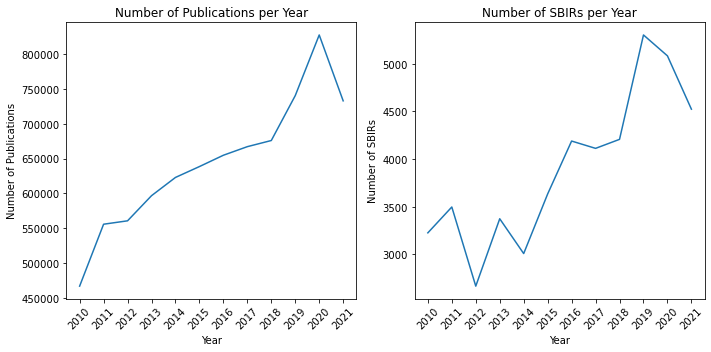

In [14]:
total_pubs_per_year = {}
for year in tqdm(years):
    pmids_list = []
    for dui in dui2pubcit:
        if not exduis[dui]:
            pmids_list += list(zip(dui2pubfreqchild[dui][year], dui2pubcitchild[dui][year]))
    pmids_set = set(pmids_list)
    # pmids_set = set([pmid for pmid in pmids_set if pmid[1] is not None])
    total_pubs_per_year[year] = np.sum([impact_score for _, impact_score in pmids_set])

total_sbirs_per_year = {}
for year in tqdm(years):
    sbids_list = []
    for dui in dui2sbfreq:
        if not exduis[dui]:
            sbids_list += list(zip(dui2sbfreqchild[dui][year], dui2sbcitchild[dui][year]))
    sbids_set = set(sbids_list)
    # sbids_set = set([sbid for sbid in sbids_set if sbid[1] is not None])
    total_sbirs_per_year[year] = np.sum([impact_score for _, impact_score in sbids_set])


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(total_pubs_per_year.keys(), total_pubs_per_year.values())
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Publications')
axs[0].set_title('Number of Publications per Year')
axs[1].plot(total_sbirs_per_year.keys(), total_sbirs_per_year.values())
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of SBIRs')
axs[1].set_title('Number of SBIRs per Year')

for ax in axs:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [ ]:
c = 0
dui2pubCitSigProp = {}
dui2sbCitSigProp = {}
for dui in tqdm(dui2pubcit):
    if not exduis[dui]:
        dui2pubCitSigProp[dui] = []
        dui2sbCitSigProp[dui] = []
        for year in years[START_YEAR_IDX:]:
            try:
                #remove those element from dui2pubcit[dui][year] that are None
                numerator = np.sum([impact_score for impact_score in dui2pubcit[dui][year] if impact_score is not None])
                dui2pubCitSigProp[dui].append(np.sum(numerator) / total_pubs_per_year[year])
            except KeyError:
                c += 1
            try:
                numerator = np.sum([impact_score for impact_score in dui2sbcit[dui][year] if impact_score is not None])
                dui2sbCitSigProp[dui].append(np.sum(numerator) / total_sbirs_per_year[year])
            except KeyError:
                c += 1

print('c:', c)
print('dui2pubCitSigProp:', len(dui2pubCitSigProp))
print('dui2sbCitSigProp:', len(dui2sbCitSigProp))
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigProp_sbCit.pkl', 'wb') as handle:
    pickle.dump(dui2pubCitSigProp, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigProp_sbCit.pkl', 'wb') as handle:
    pickle.dump(dui2sbCitSigProp, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 29307/29307 [00:07<00:00, 4172.27it/s]


c: 0
dui2pubCitSigProp: 10873
dui2sbCitSigProp: 10873


In [9]:
d = 0
dui2pubCitSigPropchild = {}
dui2sbCitSigPropchild = {}
for dui in tqdm(dui2pubcitchild):
    if not exduis[dui]:
        dui2pubCitSigPropchild[dui] = []
        dui2sbCitSigPropchild[dui] = []
        for year in years[START_YEAR_IDX:]:
            try:
                numerator = np.sum([impact_score for impact_score in dui2pubcitchild[dui][year] if impact_score is not None])
                dui2pubCitSigPropchild[dui].append(np.sum(numerator) / total_pubs_per_year[year])
            except KeyError:
                d += 1
            try:
                numerator = np.sum([impact_score for impact_score in dui2sbcitchild[dui][year] if impact_score is not None])
                dui2sbCitSigPropchild[dui].append(np.sum(numerator) / total_sbirs_per_year[year])
            except KeyError:
                d += 1

print('d:', d)
print('dui2pubCitSigPropchild:', len(dui2pubCitSigPropchild))
print('dui2sbCitSigPropchild:', len(dui2sbCitSigPropchild))

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigPropchild_sbCit.pkl', 'wb') as handle:
    pickle.dump(dui2pubCitSigPropchild, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigPropchild_sbCit.pkl', 'wb') as handle:
    pickle.dump(dui2sbCitSigPropchild, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 29307/29307 [00:18<00:00, 1561.15it/s]


d: 0
dui2pubCitSigPropchild: 10873
dui2sbCitSigPropchild: 10873


In [15]:
# read the pickles
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigProp_sbCit.pkl', 'rb') as handle:
    dui2pubCitSigProp = pickle.load(handle)
    print('dui2pubCitSigProp:', len(dui2pubCitSigProp))
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigProp_sbCit.pkl', 'rb') as handle:
    dui2sbCitSigProp = pickle.load(handle)
    print('dui2sbCitSigProp:', len(dui2sbCitSigProp))
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigPropchild_sbCit.pkl', 'rb') as handle:
    dui2pubCitSigPropchild = pickle.load(handle)
    print('dui2pubCitSigPropchild:', len(dui2pubCitSigPropchild))
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigPropchild_sbCit.pkl', 'rb') as handle:
    dui2sbCitSigPropchild = pickle.load(handle)
    print('dui2sbCitSigPropchild:', len(dui2sbCitSigPropchild))

dui2pubCitSigProp: 10873
dui2sbCitSigProp: 10873
dui2pubCitSigPropchild: 10873
dui2sbCitSigPropchild: 10873


In [9]:
sample_dui = 'D000077321'
sample_name = dui2name[sample_dui]

print(sample_dui, sample_name)
print('dui2pubCitSigProp[sample_dui]', dui2pubCitSigProp[sample_dui])
print('dui2sbCitSigProp[sample_dui]', dui2sbCitSigProp[sample_dui])
print('dui2pubCitSigPropchild[sample_dui]', dui2pubCitSigPropchild[sample_dui])
print('dui2sbCitSigPropchild[sample_dui]', dui2sbCitSigPropchild[sample_dui])

D000077321 Deep Learning
dui2pubCitSigProp[sample_dui] [1.7132225984768382e-05, 1.8441130738171477e-05, 2.4077207578969896e-05, 2.5136543800637043e-05, 2.568452262706113e-05, 3.171225008985137e-05, 4.276100150847069e-05, 0.00015514392034446446, 0.0010418816449080947, 0.0021137572846120158, 0.002511722428838308, 0.003491068166568366]
dui2sbCitSigProp[sample_dui] [0.0, 0.00021442355800157243, 0.0007498359733808229, 0.0005927243091057272, 0.0004985044865403788, 0.0011694297310311619, 0.002267438391312131, 0.0046194991490396305, 0.00861556743909685, 0.013812936073920423, 0.015343004671748218, 0.011438359949162844]
dui2pubCitSigPropchild[sample_dui] [1.7132225984768382e-05, 1.8441130738171477e-05, 2.4077207578969896e-05, 2.5136543800637043e-05, 2.568452262706113e-05, 3.171225008985137e-05, 4.276100150847069e-05, 0.00015514392034446446, 0.0010418816449080947, 0.0021137572846120158, 0.002511722428838308, 0.003491068166568366]
dui2sbCitSigPropchild[sample_dui] [0.0, 0.00021442355800157243, 0.0

In [10]:
sample_dui = 'D000077321'
sample_name = dui2name[sample_dui]

print(sample_dui, sample_name)
print('dui2pubCitSigProp[sample_dui]', dui2pubCitSigProp[sample_dui])
print('dui2sbCitSigProp[sample_dui]', dui2sbCitSigProp[sample_dui])
print('dui2pubCitSigPropchild[sample_dui]', dui2pubCitSigPropchild[sample_dui])
print('dui2sbCitSigPropchild[sample_dui]', dui2sbCitSigPropchild[sample_dui])

D000077321 Deep Learning
dui2pubCitSigProp[sample_dui] [1.7132225984768382e-05, 1.8441130738171477e-05, 2.4077207578969896e-05, 2.5136543800637043e-05, 2.568452262706113e-05, 3.171225008985137e-05, 4.276100150847069e-05, 0.00015514392034446446, 0.0010418816449080947, 0.0021137572846120158, 0.002511722428838308, 0.003491068166568366]
dui2sbCitSigProp[sample_dui] [0.0, 0.00021442355800157243, 0.0007498359733808229, 0.0005927243091057272, 0.0004985044865403788, 0.0011694297310311619, 0.002267438391312131, 0.0046194991490396305, 0.00861556743909685, 0.013812936073920423, 0.015343004671748218, 0.011438359949162844]
dui2pubCitSigPropchild[sample_dui] [1.7132225984768382e-05, 1.8441130738171477e-05, 2.4077207578969896e-05, 2.5136543800637043e-05, 2.568452262706113e-05, 3.171225008985137e-05, 4.276100150847069e-05, 0.00015514392034446446, 0.0010418816449080947, 0.0021137572846120158, 0.002511722428838308, 0.003491068166568366]
dui2sbCitSigPropchild[sample_dui] [0.0, 0.00021442355800157243, 0.0

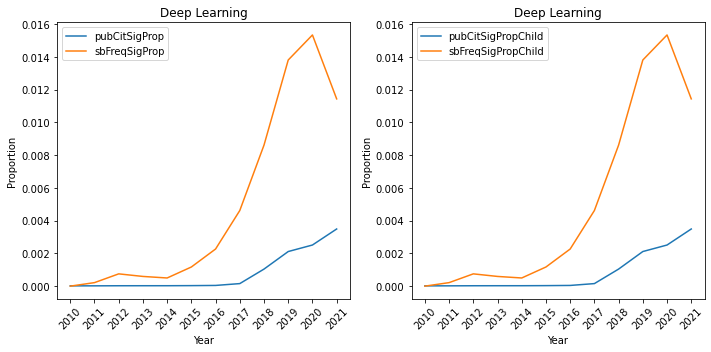

In [11]:
# now plot dui2pubCitSigPropChild[sample_dui] and dui2pubFreqSigPropChild[sample_dui] next to each other. specify sbirs with red and publications with blue lines. make the font size of x axis and y axis and the title bigger.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(years[START_YEAR_IDX:], dui2pubCitSigProp[sample_dui], label='pubCitSigProp')
ax[0].plot(years[START_YEAR_IDX:], dui2sbCitSigProp[sample_dui], label='sbFreqSigProp')
ax[0].set_title(sample_name)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Proportion')
ax[0].legend()
ax[1].plot(years[START_YEAR_IDX:], dui2pubCitSigPropchild[sample_dui], label='pubCitSigPropChild')
ax[1].plot(years[START_YEAR_IDX:], dui2sbCitSigPropchild[sample_dui], label='sbFreqSigPropChild')
ax[1].set_title(sample_name)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Proportion')
ax[1].legend()
for a in ax.flat:
    for tick in a.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [12]:
# use minmax scaling to scale the values in dui2pubCitSigProp and dui2sbCitSigProp to be between 0 and 1. also account for ZeroDivisionError.
dui2pubCitSigPropScaled = {}
dui2sbCitSigPropScaled = {}
z1, z2, z3, z4 = 0, 0, 0, 0
c = 0

for dui in tqdm(dui2pubCitSigProp):
    dui2pubCitSigPropScaled[dui] = []
    dui2sbCitSigPropScaled[dui] = []
    if len(dui2pubCitSigProp[dui]) == 0:
        c += 1
        continue
    
    min_val_pub = min(dui2pubCitSigProp[dui])
    max_val_pub = max(dui2pubCitSigProp[dui])
    min_val_sb = min(dui2sbCitSigProp[dui])
    max_val_sb = max(dui2sbCitSigProp[dui])
    
    if (min_val_pub == max_val_pub):
        dui2pubCitSigPropScaled[dui] = [0] * len(years)
    else:
        for i in range(START_YEAR_IDX, len(years)):
            dui2pubCitSigPropScaled[dui].append((dui2pubCitSigProp[dui][i-START_YEAR_IDX] - min_val_pub) / (max_val_pub - min_val_pub))
    if (min_val_sb == max_val_sb):
        dui2sbCitSigPropScaled[dui] = [0] * len(years)
    else:
        for i in range(START_YEAR_IDX, len(years)):
            dui2sbCitSigPropScaled[dui].append((dui2sbCitSigProp[dui][i-START_YEAR_IDX] - min_val_sb) / (max_val_sb - min_val_sb))

    if np.sum(dui2pubCitSigPropScaled[dui]) == 0:
        # del dui2pubCitSigPropScaled[dui]
        z1 += 1
    elif np.sum(dui2sbCitSigPropScaled[dui]) == 0:
        # del dui2sbCitSigPropScaled[dui]
        z2 += 1

dui2pubCitSigPropScaledchild = {}
dui2sbCitSigPropScaledchild = {}
d = 0

for dui in tqdm(dui2pubCitSigPropchild):
    dui2pubCitSigPropScaledchild[dui] = []
    dui2sbCitSigPropScaledchild[dui] = []
    if len(dui2pubCitSigProp[dui]) == 0:
        d += 1
        continue
    
    min_val_pub = min(dui2pubCitSigPropchild[dui])
    max_val_pub = max(dui2pubCitSigPropchild[dui])
    min_val_sb = min(dui2sbCitSigPropchild[dui])
    max_val_sb = max(dui2sbCitSigPropchild[dui])
    
    if (min_val_pub == max_val_pub):
        dui2pubCitSigPropScaledchild[dui] = [0] * len(years)
    else:
        for i in range(START_YEAR_IDX, len(years)):
            dui2pubCitSigPropScaledchild[dui].append((dui2pubCitSigPropchild[dui][i-START_YEAR_IDX] - min_val_pub) / (max_val_pub - min_val_pub))
    if (min_val_sb == max_val_sb):
        dui2sbCitSigPropScaledchild[dui] = [0] * len(years)
    else:
        for i in range(START_YEAR_IDX, len(years)):
            dui2sbCitSigPropScaledchild[dui].append((dui2sbCitSigPropchild[dui][i-START_YEAR_IDX] - min_val_sb) / (max_val_sb - min_val_sb))

    if np.sum(dui2pubCitSigPropScaledchild[dui]) == 0:
        # del dui2pubCitSigPropScaledchild[dui]
        z3 += 1
    elif np.sum(dui2sbCitSigPropScaledchild[dui]) == 0:
        # del dui2sbCitSigPropScaledchild[dui]
        z4 += 1

print('c', c)
print('d', d)
print('z1', z1)
print('z2', z2)
print('z3', z3)
print('z4', z4)
print('len(dui2pubCitSigPropScaled)', len(dui2pubCitSigPropScaled))
print('len(dui2sbCitSigPropScaled)', len(dui2sbCitSigPropScaledchild))
print('len(dui2pubCitSigPropScaledchild)', len(dui2pubCitSigPropScaledchild))
print('len(dui2sbCitSigPropScaledchild)', len(dui2sbCitSigPropScaledchild))

100%|██████████| 10873/10873 [00:00<00:00, 60768.14it/s]

c 0
d 0
z1 834
z2 0
z3 834
z4 0
len(dui2pubCitSigPropScaled) 10873
len(dui2sbCitSigPropScaled) 10873
len(dui2pubCitSigPropScaledchild) 10873
len(dui2sbCitSigPropScaledchild) 10873


In [13]:
# dui2sbCitSigPropchild['D009490']

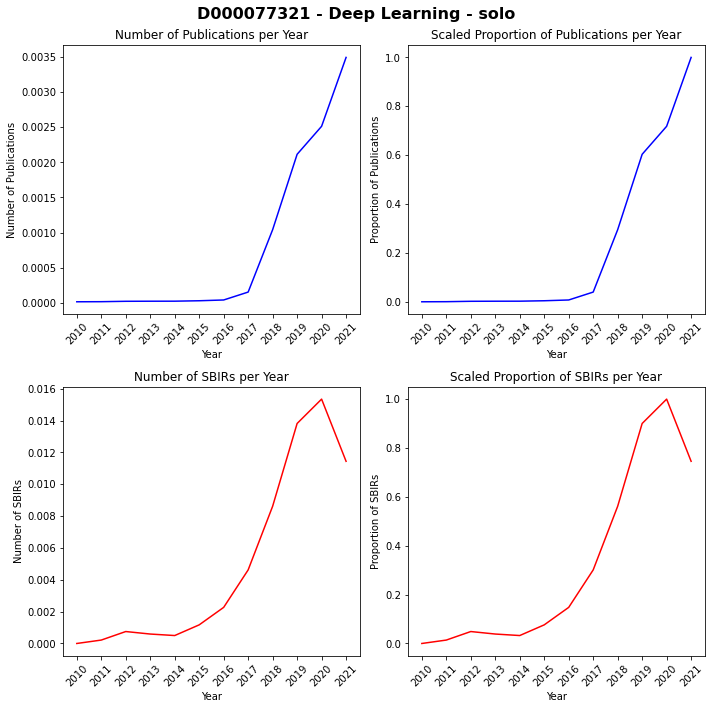

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(str(sample_dui) + ' - ' + sample_name + ' - solo', fontsize=16, fontweight='bold')
axs[0, 0].plot(years[START_YEAR_IDX:], dui2pubCitSigProp[sample_dui], color='blue')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Publications')
axs[0, 0].set_title('Number of Publications per Year')
axs[0, 1].plot(years[START_YEAR_IDX:], dui2pubCitSigPropScaled[sample_dui], color='blue')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Proportion of Publications')
axs[0, 1].set_title('Scaled Proportion of Publications per Year')
axs[1, 0].plot(years[START_YEAR_IDX:], dui2sbCitSigProp[sample_dui], color='red')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of SBIRs')
axs[1, 0].set_title('Number of SBIRs per Year')
axs[1, 1].plot(years[START_YEAR_IDX:], dui2sbCitSigPropScaled[sample_dui], color='red')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Proportion of SBIRs')
axs[1, 1].set_title('Scaled Proportion of SBIRs per Year')

for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()


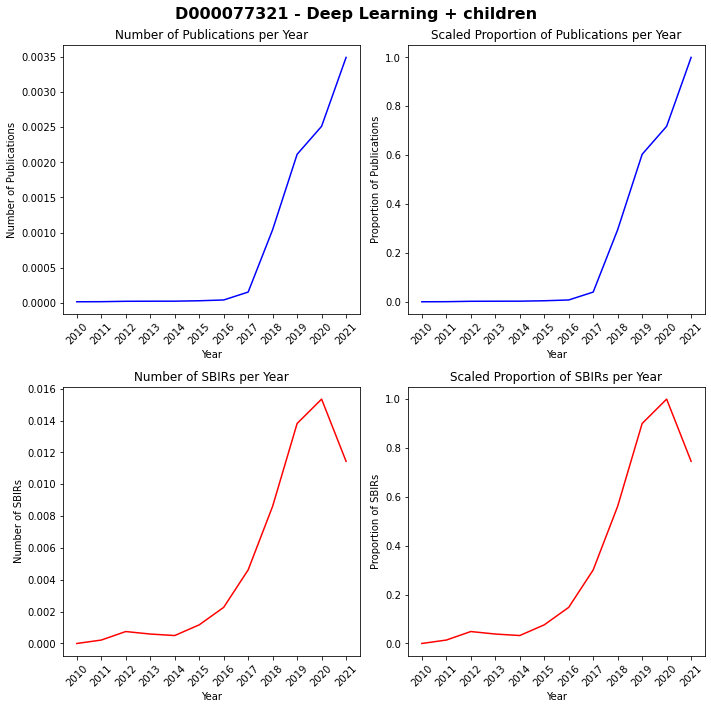

In [15]:
#draw the same for dui2pubFreqSigchild and dui2pubCitSigPropchild 

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(str(sample_dui) + ' - ' + sample_name + ' + children', fontsize=16, fontweight='bold')
axs[0, 0].plot(years[START_YEAR_IDX:], dui2pubCitSigPropchild[sample_dui], color='blue')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Publications')
axs[0, 0].set_title('Number of Publications per Year')
axs[0, 1].plot(years[START_YEAR_IDX:], dui2pubCitSigPropScaledchild[sample_dui], color='blue')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Proportion of Publications')
axs[0, 1].set_title('Scaled Proportion of Publications per Year')
axs[1, 0].plot(years[START_YEAR_IDX:], dui2sbCitSigPropchild[sample_dui], color='red')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of SBIRs')
axs[1, 0].set_title('Number of SBIRs per Year')
axs[1, 1].plot(years[START_YEAR_IDX:], dui2sbCitSigPropScaledchild[sample_dui], color='red')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Proportion of SBIRs')
axs[1, 1].set_title('Scaled Proportion of SBIRs per Year')

for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [16]:
#save dui2pubCitSigPropScaled and dui2sbCitSigPropScaled, dui2pubCitSigPropScaledchild and dui2sbCitSigPropScaledchild to data/pickles

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigPropScaled.pickle', 'wb') as f:
    pickle.dump(dui2pubCitSigPropScaled, f)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigPropScaled_cVersion.pickle', 'wb') as f:
    pickle.dump(dui2sbCitSigPropScaled, f)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigPropScaledchild.pickle', 'wb') as f:
    pickle.dump(dui2pubCitSigPropScaledchild, f)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigPropScaledchild_cVersion.pickle', 'wb') as f:
    pickle.dump(dui2sbCitSigPropScaledchild, f)

print('dui2pubCitSigPropScaled', len(dui2pubCitSigPropScaled))
print('dui2sbCitSigPropScaled', len(dui2sbCitSigPropScaled))
print('dui2pubCitSigPropScaledchild', len(dui2pubCitSigPropScaledchild))
print('dui2sbCitSigPropScaledchild', len(dui2sbCitSigPropScaledchild))                                

dui2pubCitSigPropScaled 10873
dui2sbCitSigPropScaled 10873
dui2pubCitSigPropScaledchild 10873
dui2sbCitSigPropScaledchild 10873


In [16]:
#load dui2pubCitSigPropScaled and dui2sbCitSigPropScaled, dui2pubCitSigPropScaledchild and dui2sbCitSigPropScaledchild from data/pickles

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigPropScaled.pickle', 'rb') as f:
    dui2pubCitSigPropScaled = pickle.load(f)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigPropScaled_cVersion.pickle', 'rb') as f:
    dui2sbCitSigPropScaled = pickle.load(f)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2pubCitSigPropScaledchild.pickle', 'rb') as f:
    dui2pubCitSigPropScaledchild = pickle.load(f)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2sbCitSigPropScaledchild_cVersion.pickle', 'rb') as f:
    dui2sbCitSigPropScaledchild = pickle.load(f)

print('dui2pubCitSigPropScaled', len(dui2pubCitSigPropScaled))
print('dui2sbCitSigPropScaled', len(dui2sbCitSigPropScaled))
print('dui2pubCitSigPropScaledchild', len(dui2pubCitSigPropScaledchild))
print('dui2sbCitSigPropScaledchild', len(dui2sbCitSigPropScaledchild))

dui2pubCitSigPropScaled 10873
dui2sbCitSigPropScaled 10873
dui2pubCitSigPropScaledchild 10873
dui2sbCitSigPropScaledchild 10873


In [18]:
# ('D000081186', 'Blockchain')
# ('D000077321', 'Deep Learning')
# ('D012137', 'Respiratory System')
# ('D000069550', 'Machine Learning')
# ('D019876', 'Sports Equipment')

sample_dui = 'D000069550'
year = '2020'
sample_name = dui2name[sample_dui]
print(sample_dui, sample_name, year)

D000069550 Machine Learning 2020


In [19]:
print(len(dui2pubfreq[sample_dui][year]), dui2pubfreq[sample_dui][year])
print(len(dui2sbfreq[sample_dui][year]), dui2sbfreq[sample_dui][year])
print(len(dui2pubfreqchild[sample_dui][year]), dui2pubfreqchild[sample_dui][year])
print(len(dui2sbfreqchild[sample_dui][year]), dui2sbfreqchild[sample_dui][year])

5136 [32538625, 33161227, 32079904, 32473122, 32833571, 32079910, 33194024, 31424555, 33521709, 32079917, 32768046, 32768053, 31916093, 32014404, 32047172, 32178250, 33095769, 32243801, 32047210, 32505964, 32702573, 32702574, 32899184, 31916153, 31948926, 32145537, 33554565, 32768133, 32931989, 33489060, 32276658, 32014516, 32309431, 32112826, 33226940, 32932028, 33194173, 32309439, 32997569, 32211144, 32964809, 33226957, 33030350, 32473309, 32407774, 32080093, 32800992, 32375024, 32899326, 32112901, 32112907, 32899346, 32932128, 32801058, 32375076, 32047411, 33358138, 33456445, 32375102, 32997716, 32735577, 33096026, 33227106, 32407907, 35520871, 33358189, 32735604, 32473467, 33292688, 32932240, 32113043, 32637333, 32833958, 33259944, 32080299, 32604588, 33227180, 32735660, 33128875, 32604598, 32702902, 32866745, 32768443, 32604604, 33259973, 32833991, 32080330, 32866762, 32604623, 32604633, 32604635, 32866798, 33489395, 33128961, 32539144, 32604683, 32801298, 32342553, 32244257, 3260

In [20]:
print(np.sum(dui2pubcit[sample_dui][year]), dui2pubcit[sample_dui][year])
print(np.sum(dui2sbcit[sample_dui][year]), dui2sbcit[sample_dui][year])
print(np.sum(dui2pubcitchild[sample_dui][year]), dui2pubcitchild[sample_dui][year])
print(np.sum(dui2sbcitchild[sample_dui][year]), dui2sbcitchild[sample_dui][year])

3601.5 [1, 1, 1, 0.75, 1, 0.5, 0.25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.25, 1, 0.5, 0.25, 0.75, 0.25, 0.75, 1, 1, 0.75, 0.5, 0.25, 0.25, 0.25, 0.25, 1, 0.25, 1, 0.25, 1, 0.25, 0.75, 0.5, 1, 0.75, 1, 0.25, 0.5, 0.5, 0.75, 1, 0.75, 0.75, 1, 1, 1, 0.75, 0.5, 0.5, 0.25, 1, 0.25, 1, 1, 1, 1, 1, 0.75, 0.25, 0.25, 0.75, 0.25, 0.75, 0.5, 1, 0.25, 0.75, 1, 1, 1, 0.25, 1, 1, 0.5, 0.5, 0.75, 1, 0.75, 1, 0.5, 1, 1, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 0.25, 0.25, 0.5, 1, 0.25, 0.75, 1, 0.75, 0.5, 0.5, 0.25, 0.75, 0.75, 0.25, 1, 0.25, 0.5, 1, 0.5, 1, 0.75, 1, 1, 0.75, 1, 0.5, 0.5, 1, 0.25, 1, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.75, 1, 0.75, 0.75, 1, 0.25, 1, 1, 0.75, 0.5, 1, 0.75, 0.5, 0.5, 1, 1, 0.5, 0.25, 0.25, 0.75, 1, 0.5, 0.25, 0.25, 0.75, 0.5, 0.25, 0.75, 1, 0.75, 0.25, 0.75, 0.75, 1, 0.25, 0.25, 0.75, 0.75, 0.75, 0.25, 1, 0.75, 1, 1, 1, 0.75, 1, 0.5, 0.25, 0.75, 0.5, 1, 1, 0.25, 0.25, 0.75, 0.5, 1, 1, 0.25, 0.25, 1, 1, 0.5, 0.75, 0.25, 0.5, 1, 1, 1, 1, 0.75, 0.75, 1, 

In [21]:
print(dui2pubCitSigProp[sample_dui])
print(dui2sbCitSigProp[sample_dui])
print(dui2pubCitSigPropchild[sample_dui])
print(dui2sbCitSigPropchild[sample_dui])

[0.00011939019983135465, 0.00010255067825129504, 0.00012618240268237927, 0.00017260426743104105, 0.00029777993420749, 0.0010938768734696882, 0.0014416566222855832, 0.0019670300432079566, 0.0028926362601441992, 0.0038067890777501385, 0.0043526853494339785, 0.005928402742504556]
[0.002247016891368356, 0.0036452004860267314, 0.003374261880213703, 0.005260428243313329, 0.006314390162844799, 0.0074981082754350965, 0.008890745271197565, 0.01349380014587892, 0.023648247177658944, 0.04148595134829342, 0.04991394148020654, 0.047908493120406695]
[0.00020933438625138866, 0.0005271464689057798, 0.0007896432337473275, 0.0009044966344262563, 0.001098815983638959, 0.0019203529221076667, 0.0022995492150492763, 0.0030863896810555784, 0.004899469701845059, 0.0067262052890529325, 0.007522175097841755, 0.010116047144770851]
[0.002634433596776693, 0.004002573082696019, 0.0045927453369575405, 0.0057049714751426246, 0.006646726487205052, 0.008186008117218133, 0.011217853093860015, 0.01823486506199854, 0.0311

In [22]:
print(dui2pubCitSigPropScaled[sample_dui])
print(dui2sbCitSigPropScaled[sample_dui])
print(dui2pubCitSigPropScaledchild[sample_dui])
print(dui2sbCitSigPropScaledchild[sample_dui]) 

[0.002890482180861564, 0.0, 0.004056355048231605, 0.012024608316024114, 0.03351085022465616, 0.1701598640482228, 0.2298558098052101, 0.32003548054316144, 0.47891459500191214, 0.6358277482237512, 0.7295301398504447, 1.0]
[0.0, 0.02933236424876838, 0.023648368309234405, 0.06321807790072116, 0.08532904748020749, 0.11016216022663965, 0.13937816289043584, 0.2359452251539665, 0.4489744297726722, 0.8231899749226398, 1.0, 0.9579278844377251]
[0.0, 0.0320804781970773, 0.058577336563724575, 0.07017082912564007, 0.08978574619746031, 0.1727130459480473, 0.21098974803729606, 0.29041472836991383, 0.47343002970993586, 0.6578237465497563, 0.7381702578689943, 1.0]
[0.0, 0.023528788046563283, 0.0336783656476739, 0.052806044758272684, 0.06900202060624414, 0.09547405184961537, 0.14761466951296, 0.2682908059871504, 0.4911625997872793, 0.8367911530271522, 1.0, 0.9335071277208684]


## Frequency Analysis

In [405]:
print(dui2pubfreq['D000069550']['2020'])
print(dui2sbfreq['D000069550']['2020'])

[32538625, 33161227, 32079904, 32473122, 32833571, 32079910, 33194024, 31424555, 33521709, 32079917, 32768046, 32768053, 31916093, 32014404, 32047172, 32178250, 33095769, 32243801, 32047210, 32505964, 32702573, 32702574, 32899184, 31916153, 31948926, 32145537, 33554565, 32768133, 32931989, 33489060, 32276658, 32014516, 32309431, 32112826, 33226940, 32932028, 33194173, 32309439, 32997569, 32211144, 32964809, 33226957, 33030350, 32473309, 32407774, 32080093, 32800992, 32375024, 32899326, 32112901, 32112907, 32899346, 32932128, 32801058, 32375076, 32047411, 33358138, 33456445, 32375102, 32997716, 32735577, 33096026, 33227106, 32407907, 35520871, 33358189, 32735604, 32473467, 33292688, 32932240, 32113043, 32637333, 32833958, 33259944, 32080299, 32604588, 33227180, 32735660, 33128875, 32604598, 32702902, 32866745, 32768443, 32604604, 33259973, 32833991, 32080330, 32866762, 32604623, 32604633, 32604635, 32866798, 33489395, 33128961, 32539144, 32604683, 32801298, 32342553, 32244257, 32604706,

In [411]:
tmp = []
for dui in dui2pubfreq:
    for year in years:
        if 33246195 in dui2pubfreq[dui][year]:
            tmp.append((dui, year))
tmp = [(dui2name[each[0]], each[0], each[1]) for each in tmp]
print(tmp)

[('Humans', 'D006801', '2020'), ('Acrosome', 'D000177', '2020'), ('Semen Analysis', 'D055101', '2020'), ('Algorithms', 'D000465', '2020'), ('Spermatozoa', 'D013094', '2020')]


In [412]:
dui2sbfreq['D055101']

{'2010': [],
 '2011': [],
 '2012': [],
 '2013': [],
 '2014': [],
 '2015': [],
 '2016': [],
 '2017': ['S031663'],
 '2018': [],
 '2019': ['S020669'],
 '2020': ['S011110'],
 '2021': ['S003784']}

### Granger Causality

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests

In [287]:
#calculate the granger causality between two time series for up to 11 lags
def granger_causality(x, y, maxlag):
    result = grangercausalitytests(np.array([x, y]).T, maxlag=maxlag, verbose=False)
    return result

#create dui2gc dictionary to store the granger causality p-values for each dui
dui2gcChild = {}
c = 0
for dui in tqdm(dui2pubCitSigPropScaledchild):
    sig_a = dui2pubCitSigPropScaledchild[dui]
    sig_b = dui2sbCitSigPropScaledchild[dui]
    #replace nans with 0s
    sig_a = np.nan_to_num(sig_a)
    sig_b = np.nan_to_num(sig_b)

    #upsample to to make the stretch the length of each signal from 12 to 36
    sig_a = np.repeat(sig_a, 3)
    sig_b = np.repeat(sig_b, 3)

    try:
        granger = granger_causality(sig_b, sig_a, 11)
        dui2gcChild[dui] = granger
    except Exception as e:
        if str(type(e)) == "<class 'statsmodels.tools.sm_exceptions.InfeasibleTestError'>":
            c += 1
            dui2gcChild[dui] = None

print(c)
#save dui2gc dictionary to a pickle file
with open(PICKLES_ADDRESS + 'dui2gcchild_imp.pickle', 'wb') as handle:
    pickle.dump(dui2gcChild, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('saved dui2gcChild')

  0%|          | 0/10873 [00:00<?, ?it/s]/home/admin/.local/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
100%|██████████| 10873/10873 [01:56<00:00, 93.48it/s] 


2416
saved dui2gcChild


In [18]:
#load dui2gc dictionary from pickle file
with open(PICKLES_ADDRESS + 'dui2gcchild_imp.pickle', 'rb') as handle:
    dui2gcChild = pickle.load(handle)
print('loaded dui2gcChild')

loaded dui2gcChild


In [24]:
max_depth = 13
mlag = 11
depth_wise_chi2tests_maxlen = []
depth_wise_chi2tests_std = []
depth_wise_lrtests_maxlen = []
depth_wise_lrtests_std = []
multi_level_duis = []
for depth in range(1, max_depth + 1):
    try:
        print('depth:', depth + 1)
        dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level] if dui in dui2gcChild]
        multi_level_duis.append(dui_subset)

        print('len(dui_subset):', len(dui_subset))

        lag2chi2tests = {}
        lag2lrtests = {}
        for lag in list(range(1, 12)):
            dui_subset_chi2tests = [dui2gcChild[dui][lag][0]['ssr_chi2test'][1] if dui2gcChild[dui] else 1 for dui in dui_subset]
            dui_subset_lrtests = [dui2gcChild[dui][lag][0]['lrtest'][1] if dui2gcChild[dui] else 1 for dui in dui_subset]

            chi2tests_significant_ratio = len([chi2test for chi2test in dui_subset_chi2tests if chi2test < 0.05]) / len(dui_subset_chi2tests)
            lrtests_significant_ratio = len([lrtest for lrtest in dui_subset_lrtests if lrtest < 0.05]) / len(dui_subset_lrtests)

            lag2chi2tests[lag] = chi2tests_significant_ratio
            lag2lrtests[lag] = lrtests_significant_ratio

        depth_wise_chi2tests_maxlen.append(lag2chi2tests[mlag])
        depth_wise_chi2tests_std.append(np.std(list(lag2chi2tests.values())))
        depth_wise_lrtests_maxlen.append(lag2lrtests[mlag])
        depth_wise_lrtests_std.append(np.std(list(lag2lrtests.values())))

        print('chi2tests_significant_ratio:', round(depth_wise_chi2tests_maxlen[-1], 4), '±', round(depth_wise_chi2tests_std[-1], 4))
        print('lrtests_significant_ratio:', round(depth_wise_lrtests_maxlen[-1], 4), '±', round(depth_wise_lrtests_std[-1], 4))
        print('=' * 50)
        #save the results to a pickle file
        with open(PICKLES_ADDRESS + 'depth_wise_chi2tests_maxlen_imp.pickle', 'wb') as handle:
            pickle.dump(depth_wise_chi2tests_maxlen, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(PICKLES_ADDRESS + 'depth_wise_chi2tests_std_imp.pickle', 'wb') as handle:
            pickle.dump(depth_wise_chi2tests_std, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(PICKLES_ADDRESS + 'depth_wise_lrtests_maxlen_imp.pickle', 'wb') as handle:
            pickle.dump(depth_wise_lrtests_maxlen, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(PICKLES_ADDRESS + 'depth_wise_lrtests_std_imp.pickle', 'wb') as handle:
            pickle.dump(depth_wise_lrtests_std, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('saved')

    except:
        print('=' * 50)
        print('depth:', depth)
        print('=' * 50)

depth: 2
len(dui_subset): 58
chi2tests_significant_ratio: 0.7759 ± 0.2684
lrtests_significant_ratio: 0.7069 ± 0.2447
saved
depth: 3
len(dui_subset): 853
chi2tests_significant_ratio: 0.8066 ± 0.2522
lrtests_significant_ratio: 0.7057 ± 0.2225
saved
depth: 4
len(dui_subset): 2976
chi2tests_significant_ratio: 0.7819 ± 0.2457
lrtests_significant_ratio: 0.6912 ± 0.2173
saved
depth: 5
len(dui_subset): 5653
chi2tests_significant_ratio: 0.7638 ± 0.2399
lrtests_significant_ratio: 0.6777 ± 0.2131
saved
depth: 6
len(dui_subset): 7880
chi2tests_significant_ratio: 0.7473 ± 0.2366
lrtests_significant_ratio: 0.6642 ± 0.2107
saved
depth: 7
len(dui_subset): 9283
chi2tests_significant_ratio: 0.7409 ± 0.2345
lrtests_significant_ratio: 0.6578 ± 0.2087
saved
depth: 8
len(dui_subset): 10019
chi2tests_significant_ratio: 0.7368 ± 0.2332
lrtests_significant_ratio: 0.6547 ± 0.2075
saved
depth: 9
len(dui_subset): 10491
chi2tests_significant_ratio: 0.7332 ± 0.2322
lrtests_significant_ratio: 0.6521 ± 0.2066
saved
d

In [25]:
with open(PICKLES_ADDRESS + 'depth_wise_chi2tests_maxlen_freq.pickle', 'rb') as handle:
    depth_wise_chi2tests_maxlen_freq = pickle.load(handle)
with open(PICKLES_ADDRESS + 'depth_wise_chi2tests_std_freq.pickle', 'rb') as handle:
    depth_wise_chi2tests_std_freq = pickle.load(handle)
with open(PICKLES_ADDRESS + 'depth_wise_lrtests_maxlen_freq.pickle', 'rb') as handle:
    depth_wise_lrtests_maxlen_freq = pickle.load(handle)
with open(PICKLES_ADDRESS + 'depth_wise_lrtests_std_freq.pickle', 'rb') as handle:
    depth_wise_lrtests_std_freq = pickle.load(handle)

with open(PICKLES_ADDRESS + 'depth_wise_chi2tests_maxlen_imp.pickle', 'rb') as handle:
    depth_wise_chi2tests_maxlen_imp = pickle.load(handle)
with open(PICKLES_ADDRESS + 'depth_wise_chi2tests_std_imp.pickle', 'rb') as handle:
    depth_wise_chi2tests_std_imp = pickle.load(handle)
with open(PICKLES_ADDRESS + 'depth_wise_lrtests_maxlen_imp.pickle', 'rb') as handle:
    depth_wise_lrtests_maxlen_imp = pickle.load(handle)
with open(PICKLES_ADDRESS + 'depth_wise_lrtests_std_imp.pickle', 'rb') as handle:
    depth_wise_lrtests_std_imp = pickle.load(handle)

#make them all numpy arrays
depth_wise_chi2tests_maxlen_freq = np.array(depth_wise_chi2tests_maxlen_freq) * 100
depth_wise_chi2tests_std_freq = np.array(depth_wise_chi2tests_std_freq) * 100
depth_wise_lrtests_maxlen_freq = np.array(depth_wise_lrtests_maxlen_freq) * 100
depth_wise_lrtests_std_freq = np.array(depth_wise_lrtests_std_freq) * 100

depth_wise_chi2tests_maxlen_imp = np.array(depth_wise_chi2tests_maxlen_imp) * 100
depth_wise_chi2tests_std_imp = np.array(depth_wise_chi2tests_std_imp) * 100
depth_wise_lrtests_maxlen_imp = np.array(depth_wise_lrtests_maxlen_imp) * 100
depth_wise_lrtests_std_imp = np.array(depth_wise_lrtests_std_imp) * 100

print('len(depth_wise_chi2tests_maxlen):', len(depth_wise_chi2tests_maxlen_freq))
print('len(depth_wise_chi2tests_std):', len(depth_wise_chi2tests_std_freq))
print('len(depth_wise_lrtests_maxlen):', len(depth_wise_lrtests_maxlen_freq))
print('len(depth_wise_lrtests_std):', len(depth_wise_lrtests_std_freq))

print('len(depth_wise_chi2tests_maxlen_imp):', len(depth_wise_chi2tests_maxlen_imp))
print('len(depth_wise_chi2tests_std_imp):', len(depth_wise_chi2tests_std_imp))
print('len(depth_wise_lrtests_maxlen_imp):', len(depth_wise_lrtests_maxlen_imp))
print('len(depth_wise_lrtests_std_imp):', len(depth_wise_lrtests_std_imp))

len(depth_wise_chi2tests_maxlen): 13
len(depth_wise_chi2tests_std): 13
len(depth_wise_lrtests_maxlen): 13
len(depth_wise_lrtests_std): 13
len(depth_wise_chi2tests_maxlen_imp): 13
len(depth_wise_chi2tests_std_imp): 13
len(depth_wise_lrtests_maxlen_imp): 13
len(depth_wise_lrtests_std_imp): 13


In [26]:
lrtest_freq_error_max = np.minimum(depth_wise_lrtests_maxlen_freq + depth_wise_chi2tests_std_freq, 99.9) - depth_wise_lrtests_maxlen_freq
chi2tests_freq_error_max = np.minimum(depth_wise_chi2tests_maxlen_freq + depth_wise_chi2tests_std_freq, 99.9) - depth_wise_chi2tests_maxlen_freq
lrtest_imp_error_max = np.minimum(depth_wise_lrtests_maxlen_imp + depth_wise_chi2tests_std_imp, 99.9) - depth_wise_lrtests_maxlen_imp
chi2tests_imp_error_max = np.minimum(depth_wise_chi2tests_maxlen_imp + depth_wise_chi2tests_std_imp, 99.9) - depth_wise_chi2tests_maxlen_imp

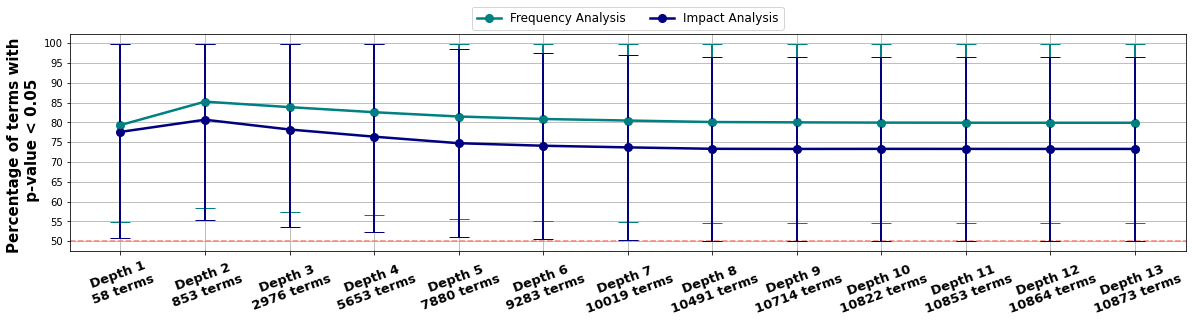

In [27]:
import matplotlib.pyplot as plt

x = ['Depth ' + str(each + 1) + '\n' + str(len(multi_level_duis[each])) + ' terms' for each in range(len(depth_wise_chi2tests_maxlen_freq))]

fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111)
ax.axhline(y=50, color='salmon', linestyle='--')
line2, = ax.plot(x, depth_wise_chi2tests_maxlen_freq, marker='o', color='teal', linewidth=2.5, markersize=8, label='Frequency Analysis')
ax.errorbar(x, depth_wise_chi2tests_maxlen_freq, yerr=[depth_wise_chi2tests_std_freq, chi2tests_freq_error_max], fmt='o', ecolor='teal', elinewidth=2, capsize=10, color='teal')
line4, = ax.plot(x, depth_wise_chi2tests_maxlen_imp, marker='o', color='navy', linewidth=2.5, markersize=8, label='Impact Analysis')
ax.errorbar(x, depth_wise_chi2tests_maxlen_imp, yerr=[depth_wise_chi2tests_std_imp, chi2tests_imp_error_max], fmt='o', ecolor='navy', elinewidth=2, capsize=10, color='navy')

ax.grid(True)  # Add gridlines
ax.set_ylabel('Percentage of terms with \n p-value < 0.05', fontsize=15, weight='bold')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=20, fontsize=13, weight='bold')
ax.set_yticks(range(50, 101, 5))  # Set y-axis ticks from 50 to 100 in steps of 10

# # Add annotations for the first line
# for i, val in enumerate(max_window_imp_percents):
#     val_formatted = '{:.2f}'.format(val)
#     ax.annotate(f'{val_formatted}', (i, val), textcoords="offset points", xytext=(30, 15), ha='center', fontsize=14, color='black')

# # Add annotations for the second line
# for i, val in enumerate(max_window_freq_percents):
#     val_formatted = '{:.2f}'.format(val)
#     ax.annotate(f'{val_formatted}', (i, val), textcoords="offset points", xytext=(30, 15), ha='center', fontsize=14, color='black')

plt.legend(loc='upper center', fontsize='large', bbox_to_anchor=(0.5, 1.15), ncol=4)  # Add legend
plt.savefig('impact_vs_freq_granger_causality.png', dpi=300, bbox_inches='tight')
plt.show()

In [245]:
from PyIF import te_compute as te

/home/admin/.local/lib/python3.10/site-packages/numba/core/decorators.py:253: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [249]:
# do the same for dui2pubCitSigPropScaledchild and dui2sbCitSigPropScaledchild
dui2teChild = {}
c = 0
for dui in tqdm(dui2pubCitSigPropScaledchild):
    # iterate over years
    for year in years:
        sig_a = np.array(dui2pubCitSigPropScaledchild[dui])
        sig_b = np.array(dui2sbCitSigPropScaledchild[dui])
        sig_a = np.nan_to_num(sig_a)
        sig_b = np.nan_to_num(sig_b)
        #
        delays_k1 = {}
        for i in range(1, 6):
            TE = te.te_compute(sig_a, sig_b, k=1, embedding=i, safetyCheck=False, GPU=False)
            delays_k1[i] = TE
        delays_k2 = {}
        for i in range(1, 6):
            TE = te.te_compute(sig_a, sig_b, k=2, embedding=i, safetyCheck=False, GPU=False)
            delays_k2[i] = TE
        dui2teChild[dui] = {'k1': delays_k1, 'k2': delays_k2}
    if c % 1000 == 0:
        with open(PICKLES_ADDRESS + 'dui2teChild_imp.pickle', 'wb') as handle:
            pickle.dump(dui2teChild, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('saved dui2teChild', len(dui2teChild))
    c += 1

with open(PICKLES_ADDRESS + 'dui2teChild_imp.pickle', 'wb') as handle:
    pickle.dump(dui2teChild, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('saved dui2teChild', len(dui2teChild))

  0%|          | 2/10873 [00:00<14:51, 12.19it/s]

saved dui2teChild 1


  9%|▉         | 1002/10873 [01:23<14:14, 11.56it/s]

saved dui2teChild 1001


 18%|█▊        | 2002/10873 [02:48<13:24, 11.02it/s]

saved dui2teChild 2001


 28%|██▊       | 3003/10873 [04:14<11:41, 11.22it/s]

saved dui2teChild 3001


 37%|███▋      | 4003/10873 [05:39<10:26, 10.97it/s]

saved dui2teChild 4001


 46%|████▌     | 5003/10873 [07:04<09:12, 10.62it/s]

saved dui2teChild 5001


 55%|█████▌    | 6003/10873 [08:29<07:49, 10.38it/s]

saved dui2teChild 6001


 64%|██████▍   | 7003/10873 [09:54<06:19, 10.21it/s]

saved dui2teChild 7001


 74%|███████▎  | 8003/10873 [11:19<04:39, 10.28it/s]

saved dui2teChild 8001


 83%|████████▎ | 9003/10873 [12:45<03:02, 10.24it/s]

saved dui2teChild 9001


 92%|█████████▏| 10003/10873 [14:10<01:26, 10.03it/s]

saved dui2teChild 10001


100%|██████████| 10873/10873 [15:23<00:00, 11.78it/s]


saved dui2teChild 10873


In [250]:
#load dui2teChild from data/pickles
with open(PICKLES_ADDRESS + 'dui2teChild_imp.pickle', 'rb') as handle:
    dui2teChild = pickle.load(handle)
print('loaded dui2teChild', len(dui2teChild))

loaded dui2teChild 10873


depth: 1
len(dui_subset): 14


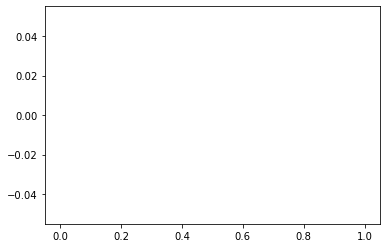

neg: 0 Ratio: 0.0
zero: 0 Ratio: 0.0
pos: 0 Ratio: 0.0
depth: 2
len(dui_subset): 90


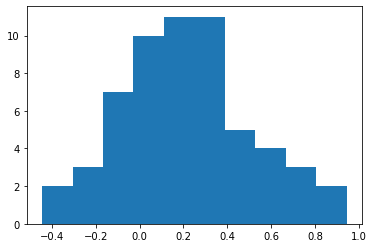

neg: 15 Ratio: 25.862068965071344
zero: 2 Ratio: 3.448275862009513
pos: 41 Ratio: 70.68965517119501


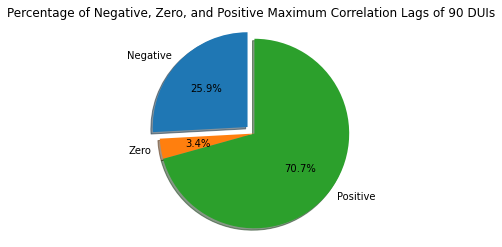

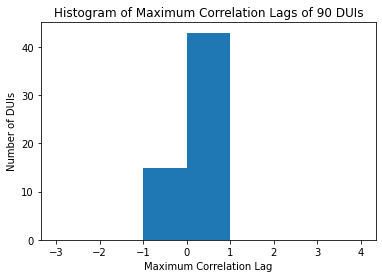

depth: 3
len(dui_subset): 1430


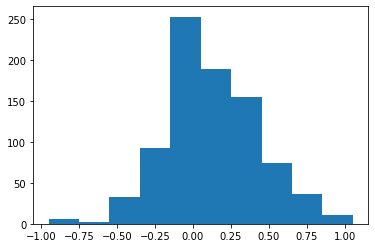

neg: 267 Ratio: 31.301289566200115
zero: 83 Ratio: 9.730363423200785
pos: 503 Ratio: 58.96834701048187


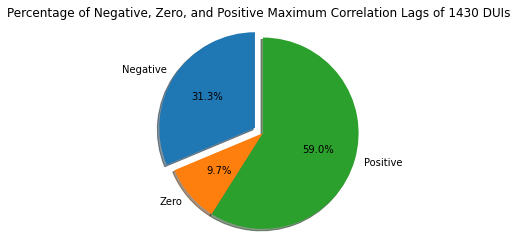

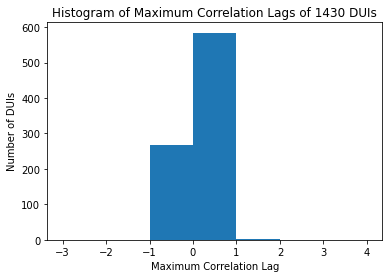

depth: 4
len(dui_subset): 5844


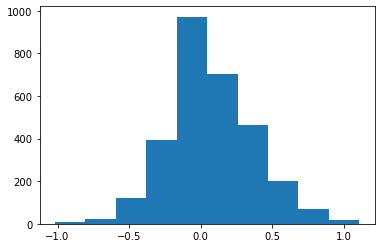

neg: 1036 Ratio: 34.811827956977545
zero: 356 Ratio: 11.96236559139383
pos: 1584 Ratio: 53.22580645159501


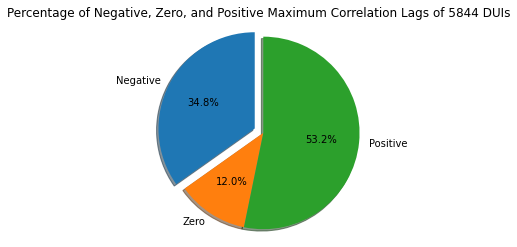

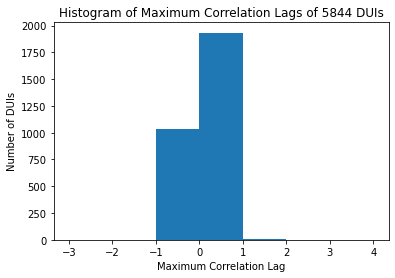

depth: 5
len(dui_subset): 12489


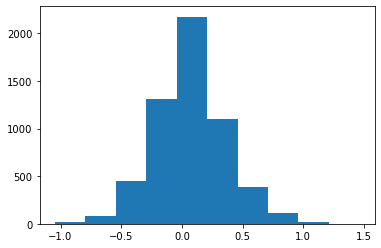

neg: 2098 Ratio: 37.113037325307424
zero: 738 Ratio: 13.055015036261619
pos: 2817 Ratio: 49.83194763841326


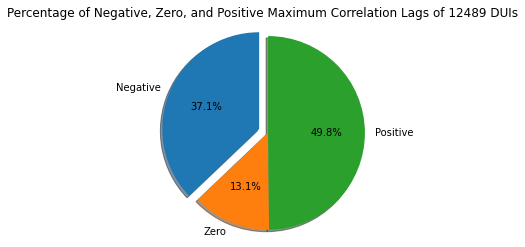

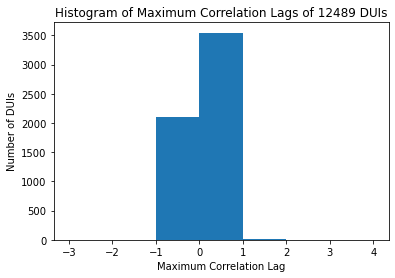

depth: 6
len(dui_subset): 18816


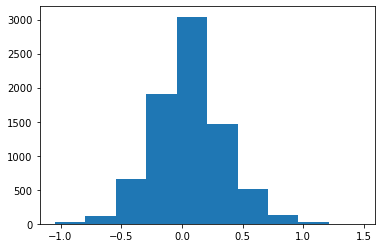

neg: 3030 Ratio: 38.45177664974131
zero: 1082 Ratio: 13.730964467003332
pos: 3768 Ratio: 47.81725888324266


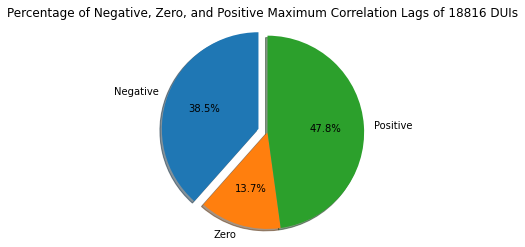

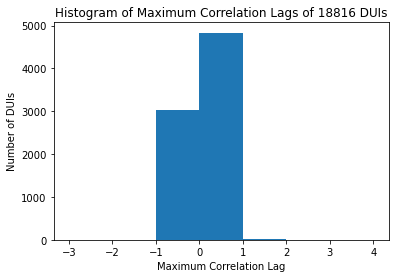

depth: 7
len(dui_subset): 23284


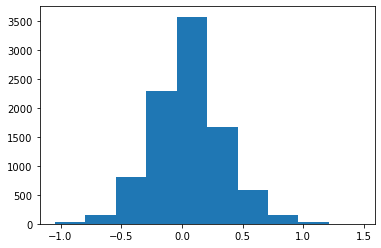

neg: 3646 Ratio: 39.276096089621966
zero: 1302 Ratio: 14.025638263490894
pos: 4335 Ratio: 46.698265646876365


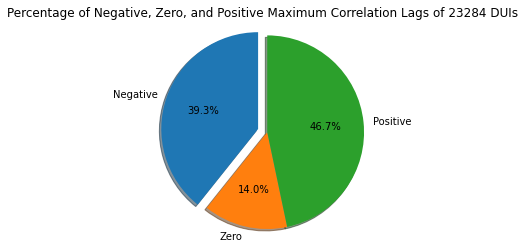

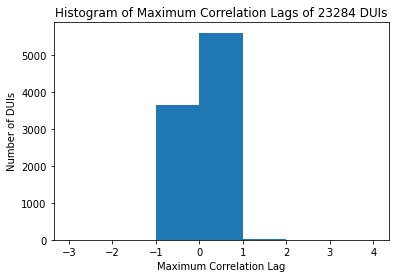

depth: 8
len(dui_subset): 25929


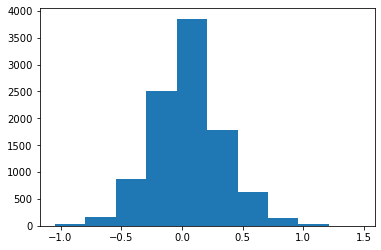

neg: 3987 Ratio: 39.794390657746305
zero: 1417 Ratio: 14.143128056690873
pos: 4615 Ratio: 46.06248128555284


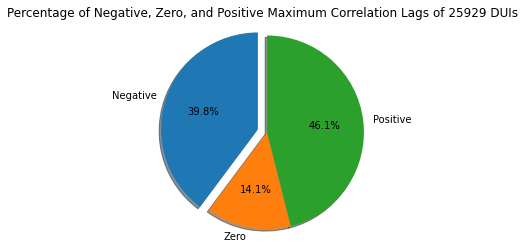

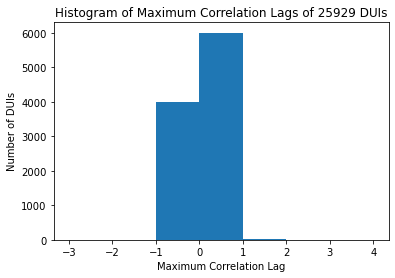

depth: 9
len(dui_subset): 27753


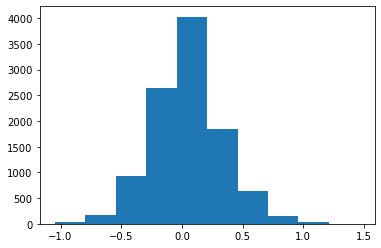

neg: 4212 Ratio: 40.14869888475454
zero: 1501 Ratio: 14.3075016680951
pos: 4778 Ratio: 45.543799447140835


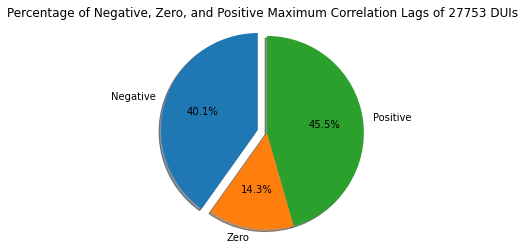

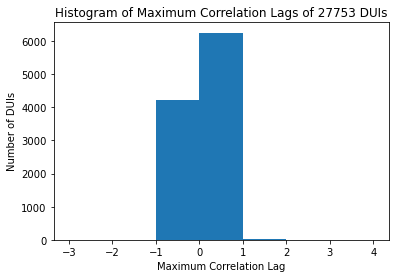

depth: 10
len(dui_subset): 28751


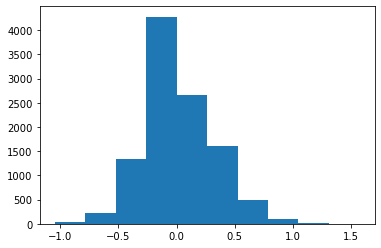

neg: 4315 Ratio: 40.274407317524705
zero: 1539 Ratio: 14.36438305021333
pos: 4860 Ratio: 45.361209632252624


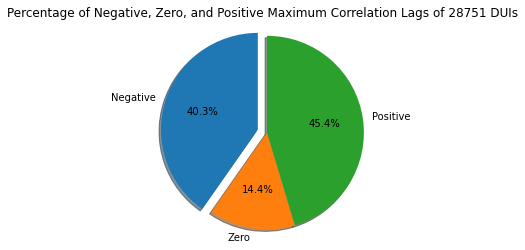

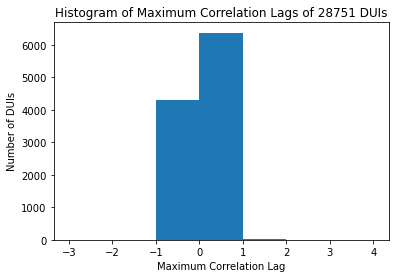

depth: 11
len(dui_subset): 29169


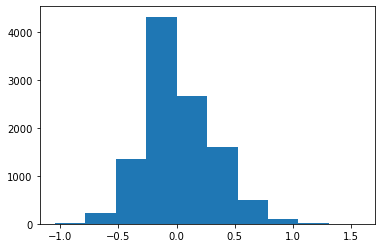

neg: 4366 Ratio: 40.34374422472368
zero: 1555 Ratio: 14.368878211050234
pos: 4901 Ratio: 45.28737756421685


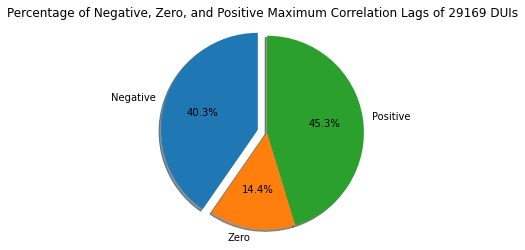

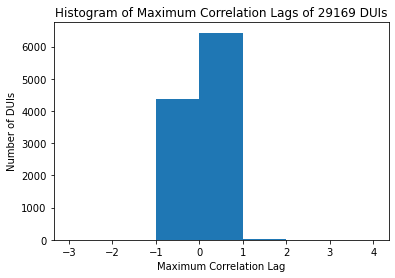

depth: 12
len(dui_subset): 29255


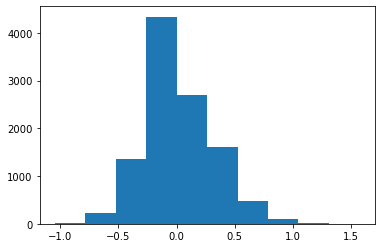

neg: 4380 Ratio: 40.35750483736844
zero: 1558 Ratio: 14.355477748086761
pos: 4915 Ratio: 45.28701741453558


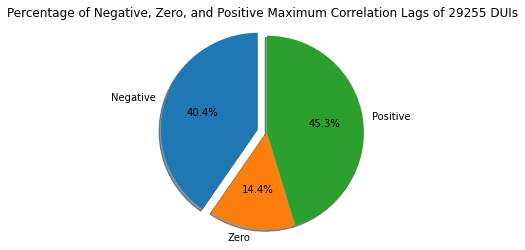

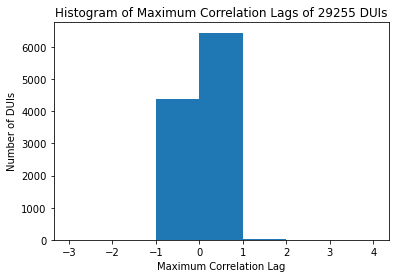

depth: 13
len(dui_subset): 29299


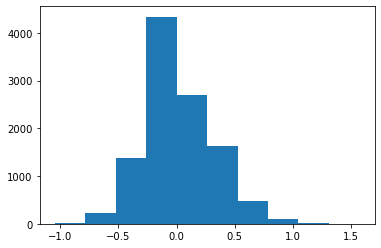

neg: 4385 Ratio: 40.362665684826915
zero: 1558 Ratio: 14.340942562590728
pos: 4921 Ratio: 45.29639175257315


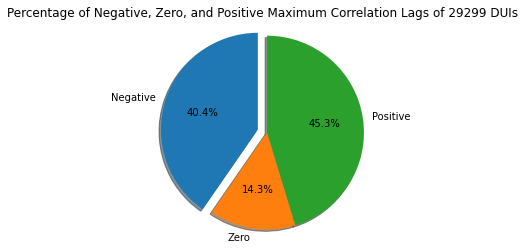

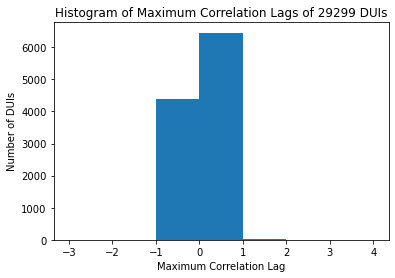

depth: 14
len(dui_subset): 29321


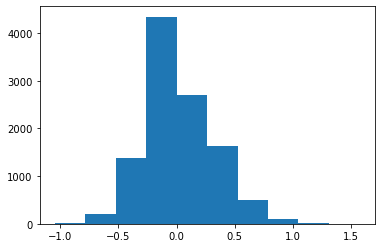

neg: 4388 Ratio: 40.35684723626962
zero: 1560 Ratio: 14.347466200679266
pos: 4925 Ratio: 45.29568656304191


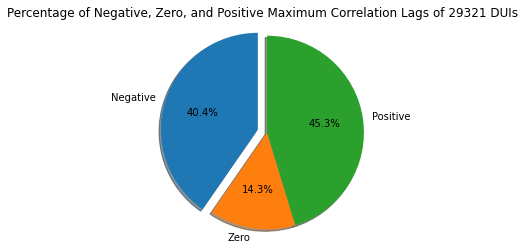

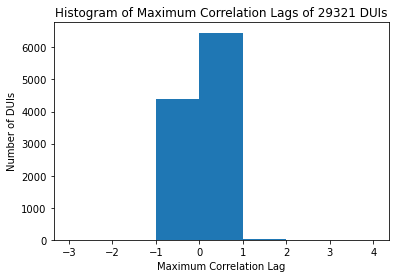

In [260]:
TE_K = 3
max_depth = 13
for depth in range(max_depth + 1):
    print('depth:', depth + 1)
    dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level]]
    print('len(dui_subset):', len(dui_subset))
    dui_subset_mcclags = [dui2teChild[dui]['k1'][TE_K] for dui in dui_subset if dui in dui2teChild]
    #create a histogram of the Transfer Entropy values stored in dui_subset_tes
    plt.hist(dui_subset_mcclags, bins=10)
    plt.show()

    neg = len([lag for lag in dui_subset_mcclags if lag < 0])
    zero = len([lag for lag in dui_subset_mcclags if lag == 0])
    pos = len([lag for lag in dui_subset_mcclags if lag > 0])
    # print the true value and percentage of negative, zero, and positive maximum correlation lags add 0.000000001 to avoid division by zero
    print('neg:', neg, 'Ratio:', neg / (len(dui_subset_mcclags) + 0.000000001) * 100)
    print('zero:', zero, 'Ratio:', zero / (len(dui_subset_mcclags) + 0.000000001) * 100)
    print('pos:', pos, 'Ratio:', pos / (len(dui_subset_mcclags) + 0.000000001) * 100)

    if neg + zero + pos == 0:
        print('=' * 50)
        continue

    # plot the three accuracy scores as a pie graph. choose the one pie graph that is empty in the middle   
    labels = 'Negative', 'Zero', 'Positive'
    sizes = [neg, zero, pos]
    explode = (0.1, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    fig1.patch.set_facecolor('white')
    plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.show()

    # plot the histogram of the maximum correlation lags of dui_subset_mcclags. bound the x-axis to -3 to 5 with 1 intervals
    plt.hist(dui_subset_mcclags, bins=range(-3, 5, 1))
    plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.xlabel('Maximum Correlation Lag')
    plt.ylabel('Number of DUIs')
    plt.show()
    
    print('=' * 50)

In [202]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

sample_dui = 'D001419'
sample_name = dui2name[sample_dui]
x = dui2pubCitSigProp[sample_dui]
y = dui2sbCitSigPropScaledchild[sample_dui]

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# Assume x is the series for PubMed papers, and y is for SBIR grants
distance, path = fastdtw(x, y, radius=1, dist=euclidean)
print(distance)
print(path)

3.9358666360203554
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (9, 9), (10, 10), (11, 11)]


In [203]:
future_impact = sum([1 for i, j in path if i < j])
past_impact = sum([1 for i, j in path if i >= j])
print('future_impact:', future_impact)
print('past_impact:', past_impact)

dtw_ratio = (future_impact + 1) / (past_impact + 1)
print('dtw_ratio:', dtw_ratio)

future_impact: 0
past_impact: 16
dtw_ratio: 0.058823529411764705


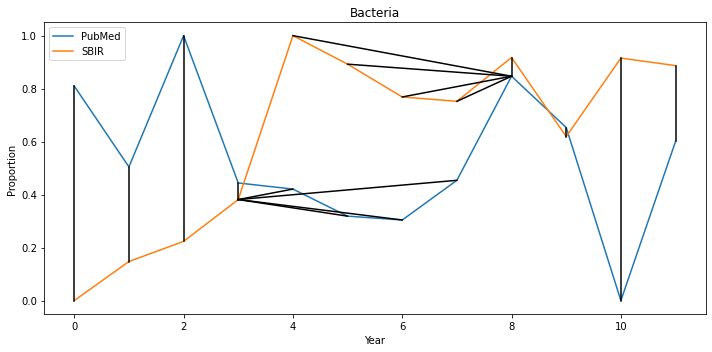

In [204]:
#plot the two trends and the dtw path
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, label='PubMed')
ax.plot(y, label='SBIR')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.set_title(sample_name)
ax.legend()

for i in range(len(path)):
    ax.plot([path[i][0], path[i][1]], [x[path[i][0]], y[path[i][1]]], color='black')

plt.tight_layout()
plt.show()

In [158]:
dui2dtwratiochild = {}

# create a dui2cc dictionary that maps a dui to a scipy cross correlation between the scaled pub and sbir frequencies
a, b, c, d, cnan = 0, 0, 0, 0, 0
for dui in dui2pubCitSigPropScaledchild:
    sigA, sigB = dui2pubCitSigPropScaledchild[dui], dui2sbCitSigPropScaledchild[dui]
    if len(sigA) == 0:
        a += 1
        continue
    if len(sigB) == 0:
        b += 1
        continue
    # if np.sum(sigA) == 0:
    #     c += 1
    #     continue
    # if np.sum(sigB) == 0:
    #     d += 1
    #     continue
    # if there is a nan, add one to cnan
    if np.isnan(sigA).any() or np.isnan(sigB).any():
        cnan += 1
    sigA = np.nan_to_num(sigA)
    sigB = np.nan_to_num(sigB)
    sigA = sigA.reshape(-1, 1)
    sigB = sigB.reshape(-1, 1)
    distance, path = fastdtw(sigA, sigB, radius=15, dist=euclidean)
    future_impact = sum(1 for i, j in path if i < j)
    past_impact = sum(1 for i, j in path if i >= j)
    dtw_ratio = future_impact - past_impact
    dui2dtwratiochild[dui] = dtw_ratio

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2citdtwratiochild.pickle', 'wb') as handle:
    pickle.dump(dui2dtwratiochild, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(a, b)
print(c, d)
print(cnan)
print('len(dui2dtwratiochild):', len(dui2dtwratiochild))

0 0
0 0
0
len(dui2dtwratiochild): 10873


depth: 1
[]
len(dui_subset): 0
neg: 0 Ratio: 0.0
pos: 0 Ratio: 0.0
depth: 2
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19]
len(dui_subset): 58
neg: 49 Ratio: 84.48275861923305
pos: 9 Ratio: 15.517241379042806
len(dui_subset_single_level): 58


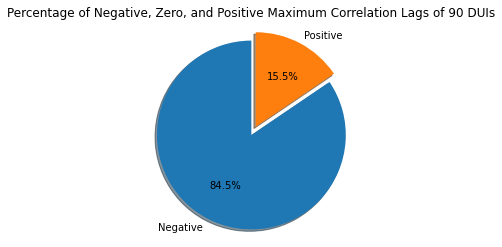

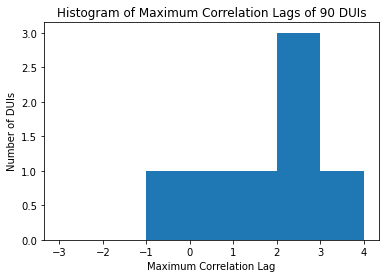

depth: 3
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 853
neg: 556 Ratio: 65.18171160601972
pos: 297 Ratio: 34.81828839386305
len(dui_subset_single_level): 795


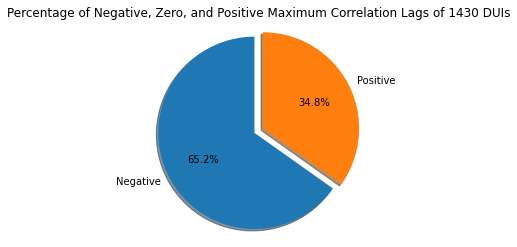

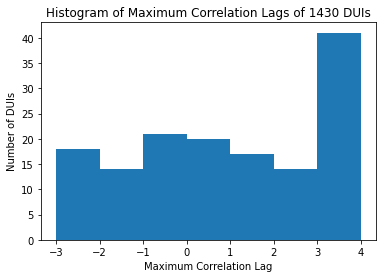

depth: 4
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 2976
neg: 1800 Ratio: 60.48387096772161
pos: 1176 Ratio: 39.516129032244784
len(dui_subset_single_level): 2123


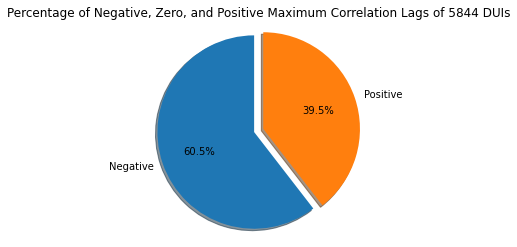

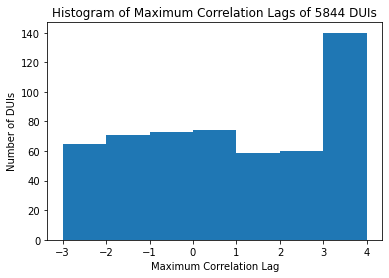

depth: 5
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 5653
neg: 3364 Ratio: 59.50822572084565
pos: 2289 Ratio: 40.49177427913665
len(dui_subset_single_level): 2677


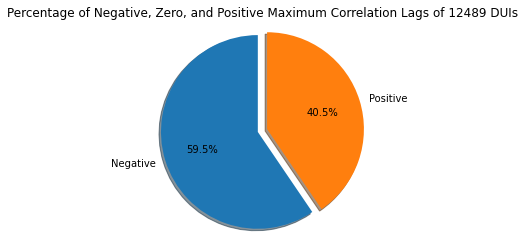

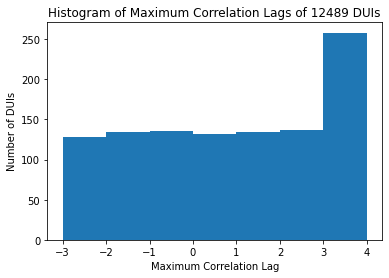

depth: 6
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 7880
neg: 4662 Ratio: 59.16243654821584
pos: 3218 Ratio: 40.837563451771466
len(dui_subset_single_level): 2227


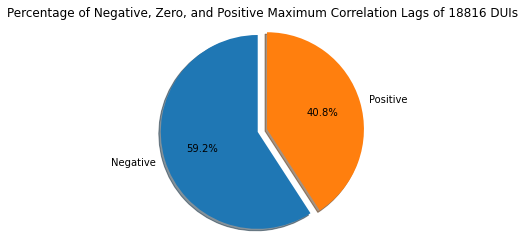

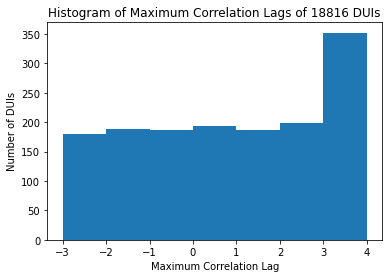

depth: 7
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 9283
neg: 5468 Ratio: 58.903371754814295
pos: 3815 Ratio: 41.096628245174934
len(dui_subset_single_level): 1403


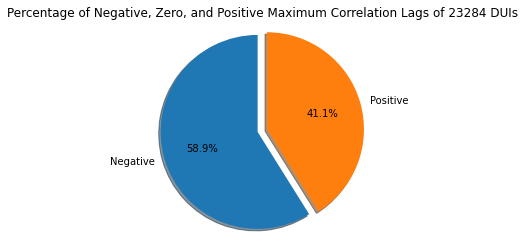

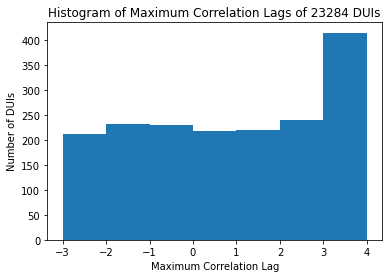

depth: 8
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10019
neg: 5927 Ratio: 59.15760055893211
pos: 4092 Ratio: 40.8423994410579
len(dui_subset_single_level): 736


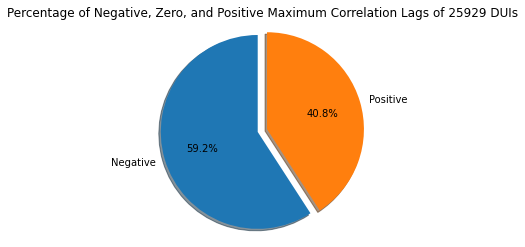

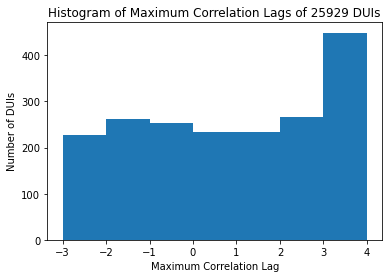

depth: 9
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10491
neg: 6194 Ratio: 59.04108283289876
pos: 4297 Ratio: 40.9589171670917
len(dui_subset_single_level): 472


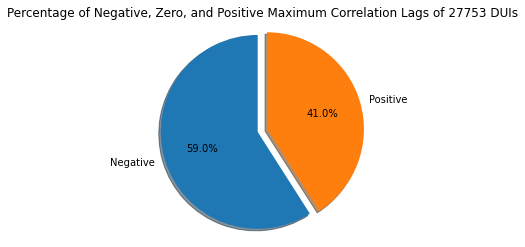

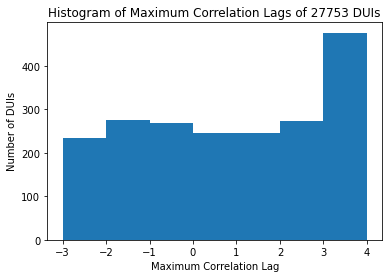

depth: 10
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10714
neg: 6314 Ratio: 58.93223819301298
pos: 4400 Ratio: 41.067761806977686
len(dui_subset_single_level): 223


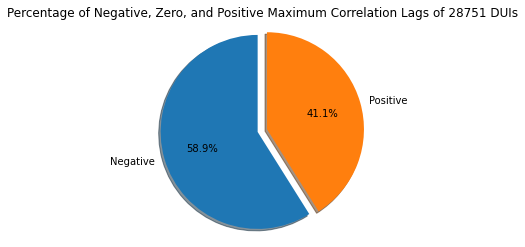

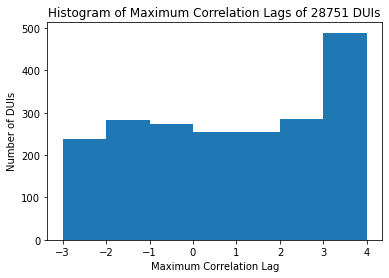

depth: 11
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10822
neg: 6380 Ratio: 58.95398262797459
pos: 4442 Ratio: 41.046017372016166
len(dui_subset_single_level): 108


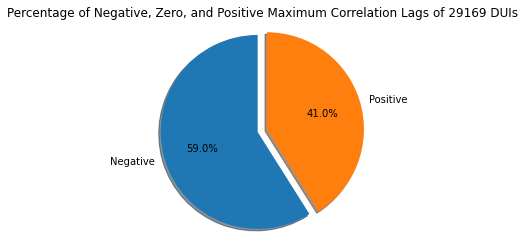

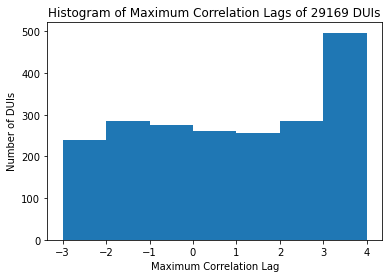

depth: 12
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10853
neg: 6400 Ratio: 58.969870081999545
pos: 4453 Ratio: 41.030129917991246
len(dui_subset_single_level): 31


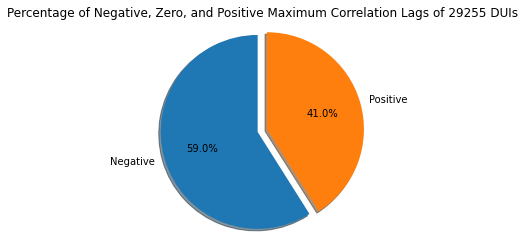

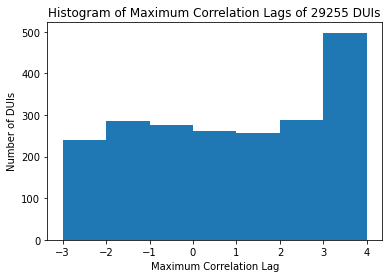

depth: 13
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10864
neg: 6408 Ratio: 58.983799705443765
pos: 4456 Ratio: 41.01620029454703
len(dui_subset_single_level): 11


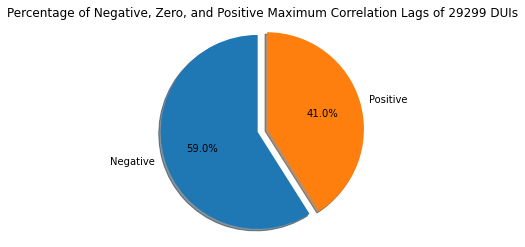

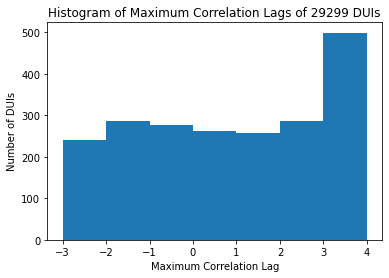

depth: 14
[-16, -16, -18, 2, -13, -15, 3, -8, -15, -11, -18, 2, -12, -18, -14, -16, -18, -15, -15, -19, -18, -15, 2, -18, 6, -18, -15, -14, -12, -14, -7, 10, -7, -13, -12, 1, 0, -12, 8, -18, -19, -16, -9, -18, -9, -19, -16, -13, 6, -12, -1, -13, -16, -7, -18, -18, -19, -19, -9, -16, -11, 1, 8, 16, 1, 1, -13, -13, 4, 19, -1, 8, -17, -15, -3, 10, -7, -10, -1, -13, -15, 6, -14, 19, 11, -11, -13, -13, -12, 19, 0, 19, -7, -14, 19, -14, -19, -18, 13, 9]
len(dui_subset): 10873
neg: 6414 Ratio: 58.990159109715904
pos: 4459 Ratio: 41.0098408902749
len(dui_subset_single_level): 9


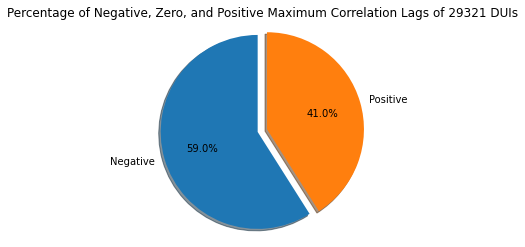

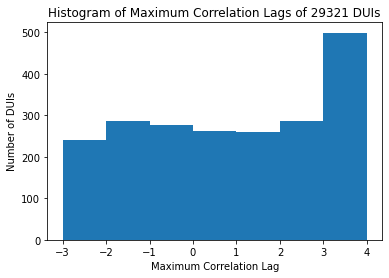

In [160]:
# iterate over max_depth and create a histogram of the maximum correlation lags of duis in dui_subset, then plot it
max_depth = 13
single_level_duis_mcclags = []
single_level_duis = []
multi_level_duis_mcclags = []
greater_one_percentages = []
greater_one_std = []
greater_one_maxs = []
greater_one_mins = []
for depth in range(max_depth + 1):
    print('depth:', depth + 1)
    dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level]]
    dui_subset_mcclags = [dui2dtwratiochild[dui] for dui in dui_subset if dui in dui2dtwratiochild]
    print(dui_subset_mcclags[:100])
    print('len(dui_subset):', len(dui_subset_mcclags))
    neg = len([lag for lag in dui_subset_mcclags if lag <= 0])
    pos = len([lag for lag in dui_subset_mcclags if lag > 0])
    ppos = pos / (len(dui_subset_mcclags) + 0.000000001) * 100
    pneg = neg / (len(dui_subset_mcclags) + 0.000000001) * 100
    print('neg:', neg, 'Ratio:', pneg)
    print('pos:', pos, 'Ratio:', ppos)

    if neg + pos == 0:
        print('=' * 50)
        continue

    dui_subset_single_level = [dui for dui in level2duis[depth] if dui in dui2dtwratiochild]
    single_level_duis.append(dui_subset_single_level)
    print('len(dui_subset_single_level):', len(dui_subset_single_level))
    dui_subset_single_level_mcclags = [dui2dtwratiochild[dui] for dui in dui_subset_single_level]
    single_level_duis_mcclags.append(dui_subset_single_level_mcclags)
    greater_one_maxs.append([dui_subset_single_level[np.argmax(dui_subset_single_level_mcclags)], np.max(dui_subset_single_level_mcclags)])
    greater_one_mins.append([dui_subset_single_level[np.argmin(dui_subset_single_level_mcclags)], np.min(dui_subset_single_level_mcclags)])
    dui_greater_one_std = np.std(dui_subset_single_level_mcclags)
    greater_one_std.append(dui_greater_one_std)
    greater_one_percentages.append(ppos)
    multi_level_duis_mcclags.append(dui_subset_mcclags)
    
    # plot the three accuracy scores as a pie graph. choose the one pie graph that is empty in the middle   
    labels = 'Negative', 'Positive'
    sizes = [neg, pos]
    explode = (0.1, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    fig1.patch.set_facecolor('white')
    plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.show()

    # plot the histogram of the maximum correlation lags of dui_subset_mcclags. bound the x-axis to -3 to 5 with 1 intervals
    plt.hist(dui_subset_mcclags, bins=range(-3, 5, 1))
    plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.xlabel('Maximum Correlation Lag')
    plt.ylabel('Number of DUIs')
    plt.show()

   #save pos / (len(dui_subset_mcclags) + 0.000000001) * 100 to a txt file named like STIDX_<START_FROM_IDX>_DEPTH_<depth>.txt at data/SF11/results
    with open(LAG_DATA_ADDRESS + SF_TAG + '/results/DEPTH_' + str(depth) + '_IMP_DTW.txt', 'w') as f:
        f.write(str(ppos))
    
    print('=' * 50)

### Cross-Correlation

In [228]:
# create a dui2cc dictionary that maps a dui to a scipy cross correlation between the scaled pub and sbir frequencies
a, b, c, d, cnan = 0, 0, 0, 0, 0
dui2cc = {}
dui2ccchild = {}
for dui in tqdm(dui2pubCitSigPropScaled):
    sigA, sigB = dui2pubCitSigPropScaled[dui], dui2sbCitSigPropScaled[dui]
    if len(sigA) == 0:
        a += 1
        continue
    if len(sigB) == 0:
        b += 1
        continue
    # if there is a nan, add one to cnan
    if np.isnan(sigA).any() or np.isnan(sigB).any():
        cnan += 1
    sigA = np.nan_to_num(sigA)
    sigB = np.nan_to_num(sigB)
    corr = signal.correlate(sigB, sigA, mode='full') / len(years)
    corr = corr.astype(np.float64)
    lags = signal.correlation_lags(len(sigB), len(sigA))
    corr /= np.max(corr) + 1e-8
    dui2cc[dui] = corr
    
for dui in tqdm(dui2pubCitSigPropScaledchild):
    sigA, sigB = dui2pubCitSigPropScaledchild[dui], dui2sbCitSigPropScaledchild[dui]
    if len(sigA) == 0:
        c += 1
        continue
    if len(sigB) == 0:
        d += 1
        continue
    sigA = np.nan_to_num(sigA)
    sigB = np.nan_to_num(sigB)
    corr = signal.correlate(sigB, sigA, mode='full') / len(years)
    corr = corr.astype(np.float64)
    lags = signal.correlation_lags(len(sigB), len(sigA))
    corr /= np.max(corr) + 1e-8
    dui2ccchild[dui] = corr

#save the dui2cc and dui2ccchild dictionaries in data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2cc_cVersion.pickle', 'wb') as handle:
    pickle.dump(dui2cc, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2ccchild_cVersion.pickle', 'wb') as handle:
    pickle.dump(dui2ccchild, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(a, b)
print(c, d)
print(cnan)
print('Saved dui2cc and dui2ccchild.')
print('len(dui2cc):', len(dui2cc))
print('len(dui2ccchild):', len(dui2ccchild))

100%|██████████| 10873/10873 [00:00<00:00, 20806.81it/s]

0 0
0 0
0
Saved dui2cc and dui2ccchild.
len(dui2cc): 10873
len(dui2ccchild): 10873


In [229]:
len(lags), len(dui2cc[sample_dui])
lags

array([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11])

In [30]:
#load the dui2cc and dui2ccchild dictionaries from data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2cc_cVersion.pickle', 'rb') as handle:
    dui2cc = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2ccchild_cVersion.pickle', 'rb') as handle:
    dui2ccchild = pickle.load(handle)

print('Loaded dui2cc and dui2ccchild.')

Loaded dui2cc and dui2ccchild.


In [31]:
# ('D000081186', 'Blockchain')
# ('D000077321', 'Deep Learning')
# ('D012137', 'Respiratory System')
# ('D000069550', 'Machine Learning')
# ('D009490', ''Neurosecretory Systems')
# ('D019876', 'Sports Equipment')
# ('D014612', 'Vaccines')
# ('D009369', 'Neoplasms')
# ('D009446', 'Neurobiology')

sample_dui = 'D055585'
sample_name = dui2name[sample_dui]
print(sample_dui, sample_name)
print(dui2pubCitSigPropScaled[sample_dui])
print(dui2sbCitSigPropScaled[sample_dui])
print(dui2pubCitSigPropScaledchild[sample_dui])
print(dui2sbCitSigPropScaledchild[sample_dui]) 

D055585 Physical Phenomena
[0.36626503091763585, 0.0632973551229511, 0.010134181748201519, 0.15958733409719802, 0.1758430927134991, 0.0, 0.22016620221194685, 0.3826907094769477, 0.3612420975707429, 0.30433970611851857, 0.4879272978726701, 1.0]
[0.8331179592467542, 1.0, 0.4019594729456746, 0.17822689855680535, 0.08108440265329463, 0.5675751279989806, 0.0, 0.24065683010951347, 0.5906945330448071, 0.4259814858507874, 0.24039417078114517, 0.1760789768121831]
[1.0, 0.8181887082880874, 0.8170916246395539, 0.7298431473301374, 0.650544733715649, 0.5854710517059568, 0.45211940968674863, 0.4085623630741506, 0.38324565696263496, 0.1987820474075983, 0.0, 0.26852947936923655]
[0.30872086370183655, 1.0, 0.9856651667476102, 0.0, 0.5700711867781971, 0.5291304976775544, 0.4261145409729, 0.18487053708870096, 0.280067171387604, 0.16415649621676773, 0.40287398451562156, 0.40310255077568513]


In [32]:
c = 0
for dui in dui2sbCitSigPropScaled:
    if sum(dui2sbCitSigPropScaled[dui]) == 0:
        c += 1
len(dui2sbCitSigPropScaled), c

(10873, 833)

maximum_correlation_lag: 1
pos_auc: 4.849293122951601
neg_auc: 3.649850780129621
ccauc: 1.2579528676377318


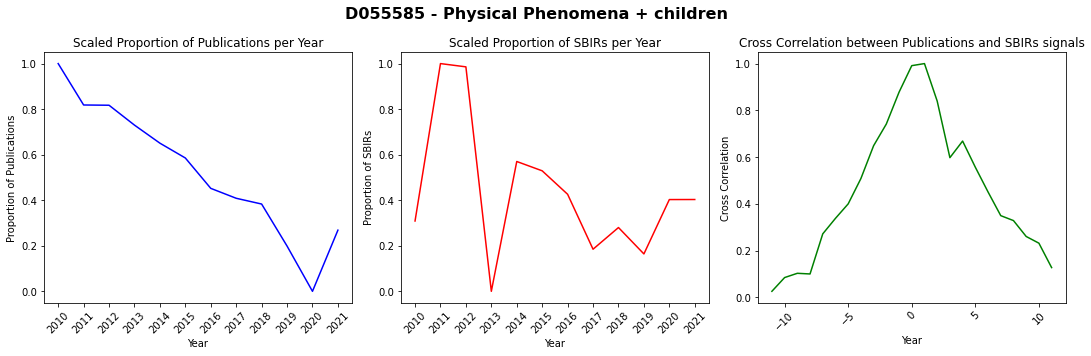

In [33]:
# plot three plots next to each other, one for dui2pubCitSigPropScaled, one for dui2sbCitSigPropScaled, and one for dui2cc
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(str(sample_dui) + ' - ' + sample_name + ' + children', fontsize=16, fontweight='bold')
axs[0].plot(years[START_YEAR_IDX:], dui2pubCitSigPropScaledchild[sample_dui], color='blue')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Proportion of Publications')
axs[0].set_title('Scaled Proportion of Publications per Year')
axs[1].plot(years[START_YEAR_IDX:], dui2sbCitSigPropScaledchild[sample_dui], color='red')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Proportion of SBIRs')
axs[1].set_title('Scaled Proportion of SBIRs per Year')
axs[2].plot(correlation_lags, dui2ccchild[sample_dui], color='green')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Cross Correlation')
axs[2].set_title('Cross Correlation between Publications and SBIRs signals')

# calculate the maximum correlation lag
maximum_correlation_lag = correlation_lags[np.argmax(dui2ccchild[sample_dui])]
print('maximum_correlation_lag:', maximum_correlation_lag)
#calcualte the AUC of the cross-correlation signal
zero_index = correlation_lags.index(0)
pos_auc = np.trapz(dui2ccchild[sample_dui][zero_index + 1:], dx=1)
neg_auc = np.trapz(dui2ccchild[sample_dui][:zero_index], dx=1)
ccauc = (pos_auc + 1) / (neg_auc + 1)

print('pos_auc:', pos_auc)
print('neg_auc:', neg_auc)
print('ccauc:', ccauc)

for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [34]:
# create dui2mcclag and dui2mcclagchild
dui2mcclag = {}
dui2mcclagchild = {}
dui2aucratio = {}
dui2aucratiochild = {}
for dui in tqdm(dui2cc):
    dui2mcclag[dui] = correlation_lags[np.argmax(dui2cc[dui])]
for dui in tqdm(dui2ccchild):
    dui2mcclagchild[dui] = correlation_lags[np.argmax(dui2ccchild[dui])]
for dui in tqdm(dui2cc):
    zero_index = correlation_lags.index(0)
    pos_auc = np.trapz(dui2cc[dui][zero_index + 1:], dx=1)
    neg_auc = np.trapz(dui2cc[dui][:zero_index], dx=1)
    dui2aucratio[dui] = (pos_auc + 1) / (neg_auc + 1)
for dui in tqdm(dui2ccchild):
    zero_index = correlation_lags.index(0)
    pos_auc = np.trapz(dui2ccchild[dui][zero_index:], dx=1)
    neg_auc = np.trapz(dui2ccchild[dui][:zero_index], dx=1)
    dui2aucratiochild[dui] = (pos_auc + 1) / (neg_auc + 1)

with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclag_cVersion.pickle', 'wb') as handle:
    pickle.dump(dui2mcclag, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclagchild_cVersion.pickle', 'wb') as handle:
    pickle.dump(dui2mcclagchild, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratio_cVersion.pickle', 'wb') as handle:
    pickle.dump(dui2aucratio, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratiochild_cVersion.pickle', 'wb') as handle:
    pickle.dump(dui2aucratiochild, handle, protocol=pickle.HIGHEST_PROTOCOL)

print('len(dui2mcclag):', len(dui2mcclag))
print('len(dui2mcclagchild):', len(dui2mcclagchild))
print('len(dui2aucratio):', len(dui2aucratio))
print('len(dui2aucratiochild):', len(dui2aucratiochild))

100%|██████████| 10873/10873 [00:00<00:00, 92627.65it/s]

len(dui2mcclag): 10873
len(dui2mcclagchild): 10873
len(dui2aucratio): 10873
len(dui2aucratiochild): 10873


In [35]:
# load dui2mcclag and dui2mcclagchild from data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclag_cVersion.pickle', 'rb') as handle:
    dui2mcclag = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2mcclagchild_cVersion.pickle', 'rb') as handle:
    dui2mcclagchild = pickle.load(handle)
# load dui2aucratio and dui2aucratiochild from data/pickle
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratio_cVersion.pickle', 'rb') as handle:
    dui2aucratio = pickle.load(handle)
with open(LAG_DATA_ADDRESS + SF_TAG + '/dui2aucratiochild_cVersion.pickle', 'rb') as handle:
    dui2aucratiochild = pickle.load(handle)

print('len(dui2mcclag):', len(dui2mcclag))
print('len(dui2mcclagchild):', len(dui2mcclagchild))
print('len(dui2aucratio):', len(dui2aucratio))
print('len(dui2aucratiochild):', len(dui2aucratiochild))

len(dui2mcclag): 10873
len(dui2mcclagchild): 10873
len(dui2aucratio): 10873
len(dui2aucratiochild): 10873


In [36]:
#select duis from levels 0 to 3 from level1duis
depth = 10
dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level]]
len(dui_subset)

29169

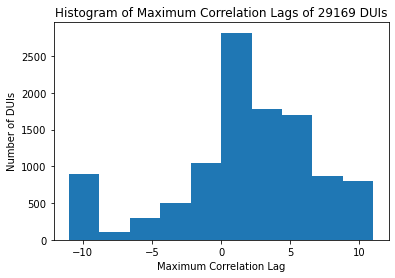

In [37]:
# create a histogram of the maximum correlation lags of duis in dui_subset, then plot it
dui_subset_mcclags = [dui2mcclag[dui] for dui in dui_subset if dui in dui2mcclag]
plt.hist(dui_subset_mcclags, bins=10)
plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
plt.xlabel('Maximum Correlation Lag')
plt.ylabel('Number of DUIs')
plt.show()

neg: 2857
zero: 1531
pos: 6434


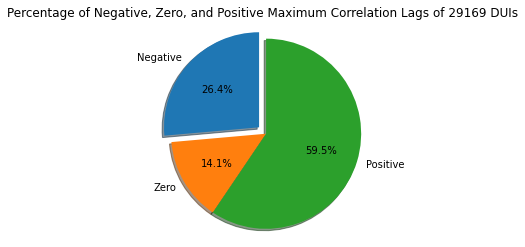

In [38]:
#return the percentage of negative, zero, and positive maximum correlation lags as a circle graph
dui_subset_mcclags = [dui2mcclag[dui] for dui in dui_subset if dui in dui2mcclag]
neg = len([lag for lag in dui_subset_mcclags if lag < 0])
zero = len([lag for lag in dui_subset_mcclags if lag == 0])
pos = len([lag for lag in dui_subset_mcclags if lag > 0])
print('neg:', neg)
print('zero:', zero)
print('pos:', pos)

labels = 'Negative', 'Zero', 'Positive'
sizes = [neg, zero, pos]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
fig1.patch.set_facecolor('white')
plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
plt.show()

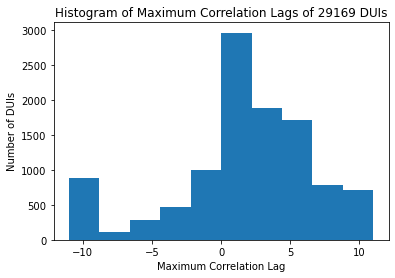

In [39]:
# create a histogram of the maximum correlation lags of duis in dui_subset, then plot it
dui_subset_mcclags = [dui2mcclagchild[dui] for dui in dui_subset if dui in dui2mcclagchild]
plt.hist(dui_subset_mcclags, bins=10)
plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
plt.xlabel('Maximum Correlation Lag')
plt.ylabel('Number of DUIs')
plt.show()

neg: 2747
zero: 1661
pos: 6414


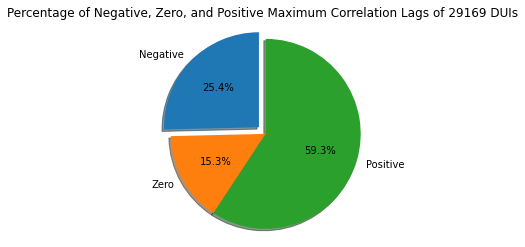

In [40]:
#return the percentage of negative, zero, and positive maximum correlation lags as a circle graph
dui_subset_mcclags = [dui2mcclagchild[dui] for dui in dui_subset if dui in dui2mcclagchild]
neg = len([lag for lag in dui_subset_mcclags if lag < 0])
zero = len([lag for lag in dui_subset_mcclags if lag == 0])
pos = len([lag for lag in dui_subset_mcclags if lag > 0])
print('neg:', neg)
print('zero:', zero)
print('pos:', pos)

labels = 'Negative', 'Zero', 'Positive'
sizes = [neg, zero, pos]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
fig1.patch.set_facecolor('white')
plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
plt.show()

depth: 1
[]
len(dui_subset): 0
neg: 0 Ratio: 0.0
pos: 0 Ratio: 0.0
depth: 2
[('D012140', 0.6052384261481696), ('D007254', 2.5454867808651507), ('D002319', 2.089763716563167), ('D055641', 1.158437602536541), ('D018514', 1.2282862503694787), ('D002477', 2.622028881363212), ('D055598', 1.8992564519588713), ('D013812', 2.4690535555414725), ('D009422', 1.0541131751358495), ('D055585', 1.4720634308897114), ('D002318', 0.9303296770961477), ('D013514', 2.2551049032947343), ('D001523', 1.5334406933772482), ('D012137', 0.7083347304856787), ('D014947', 1.4536411258148332), ('D006281', 0.9918694380012921), ('D004364', 1.6506660386475516), ('D008827', 1.0851469749413998), ('D001686', 3.1306477814198432), ('D007154', 2.2193543053345457), ('D056890', 0.8183181450593902), ('D009140', 2.136315474573374), ('D003933', 2.931614522619524), ('D009057', 3.5830824750585526), ('D008660', 2.605404108327808), ('D001685', 2.666594357044024), ('D005128', 0.9032600662928675), ('D009420', 3.252985676702722), ('D0080

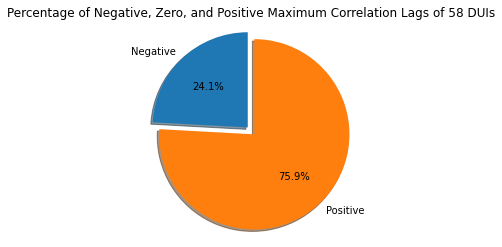

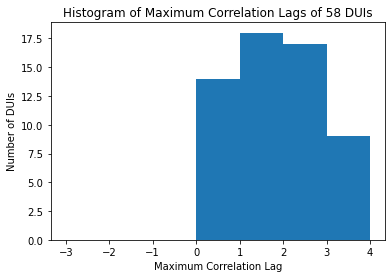

depth: 3
[('D014937', 1.5482283702586324), ('D017741', 1.0), ('D003273', 3.450370918207171), ('D004798', 3.8652695950162337), ('D010919', 4.849789009726566), ('D020878', 5.327905923081244), ('D012586', 0.5692492825960451), ('D008107', 1.4751825322397536), ('D017831', 6.812917037583121), ('D008566', 2.6804402718219738), ('D008962', 1.6992040237580324), ('D006094', 2.044845499430604), ('D000013', 3.855790212442902), ('D004427', 1.883496591725896), ('D009132', 2.928458694170567), ('D006296', 1.0), ('D055442', 0.9492575590553584), ('D000068079', 0.5668063766173999), ('D010106', 4.378872487911309), ('D002384', 1.7549212087113577), ('D036341', 3.9459823287383102), ('D014930', 1.0), ('D002448', 2.883120347279433), ('D003646', 1.9303569375193332), ('D010600', 3.6301302149518357), ('D002454', 3.0531107915062536), ('D000091282', 3.0274322693697577), ('D003711', 0.9787986948452542), ('D014116', 4.724712574561156), ('D064307', 1.2056271980582898), ('D064420', 1.827107894316756), ('D057210', 1.7724

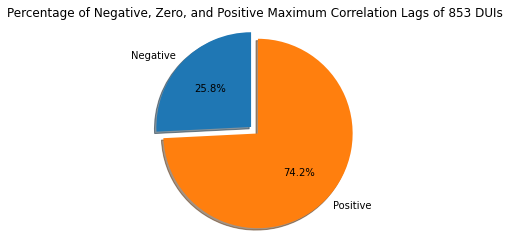

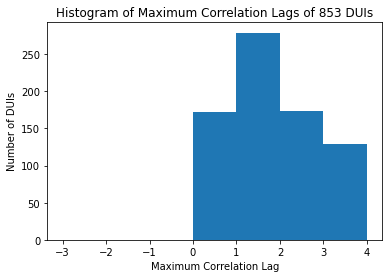

depth: 4
[('D017563', 1.377503575511202), ('D002627', 3.499354030076232), ('D058728', 0.42092373644878256), ('D003069', 0.6005393003988162), ('D019693', 2.984715069175143), ('D020714', 4.851464540627811), ('D018630', 3.3931205459716516), ('D006019', 1.1720364777835106), ('D054792', 2.2455788963361707), ('D058447', 0.5748091527933228), ('D009681', 2.296221685053618), ('D008262', 2.0129786877545044), ('D063646', 1.932258842644029), ('D005356', 3.978141155813139), ('D008051', 3.9135491443278334), ('D012433', 3.6639733491974873), ('D012151', 1.0317138047668242), ('D010195', 1.762387745497424), ('D021721', 1.5317398498122474), ('D010209', 1.2142677623438114), ('D003617', 6.781070157823339), ('D010778', 0.6295046458783063), ('D057925', 5.004207538166374), ('D055370', 1.3118157700851714), ('D004547', 4.472711918850224), ('D015858', 4.852386880064495), ('D058013', 0.6226553137038351), ('D004741', 2.04555325141768), ('D007448', 2.182968424904782), ('D018846', 3.530357284154548), ('D040441', 1.0

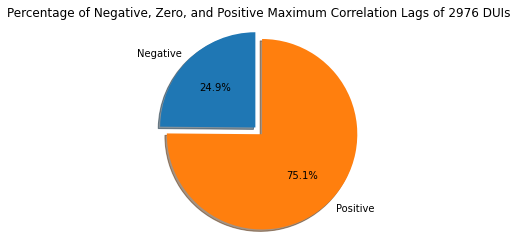

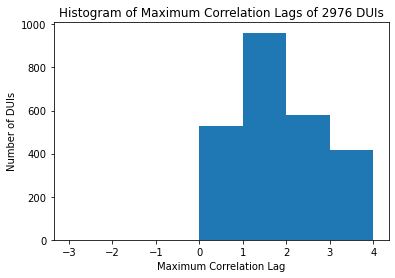

depth: 5
[('D000075065', 5.62215512487062), ('D059247', 4.4051417869099545), ('D010173', 4.843486171209382), ('D024002', 3.8966941125410046), ('D003187', 4.526401404782577), ('D014691', 1.0), ('D000649', 5.0466671003812476), ('D011588', 2.6636456759673406), ('D014699', 2.7686509080988584), ('D002065', 3.8700336508404893), ('D016172', 2.661161945081703), ('D003540', 5.8823192108084985), ('D066128', 1.18515683675868), ('D007802', 1.7719787535676907), ('D000067563', 4.846232597164921), ('D053590', 4.161733291990801), ('D019829', 2.885295780743892), ('D000076122', 2.8916444793870024), ('D002586', 1.146930329585197), ('D020773', 1.4244203032655436), ('D009773', 1.0), ('D018670', 1.9489466238021318), ('D062105', 1.2575509957049842), ('D009989', 2.1773869644672383), ('D000072916', 0.9074983720020674), ('D001228', 2.6406448663875994), ('D007265', 3.6947535735019934), ('D011392', 4.111139291431174), ('D006503', 4.152465953342831), ('D004502', 1.8469590162956344), ('D006764', 1.0), ('D005263', 6

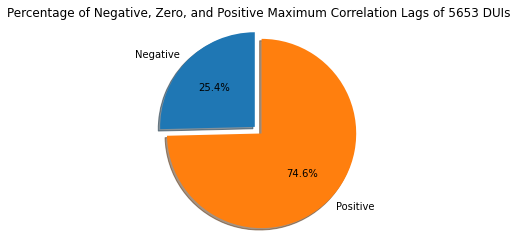

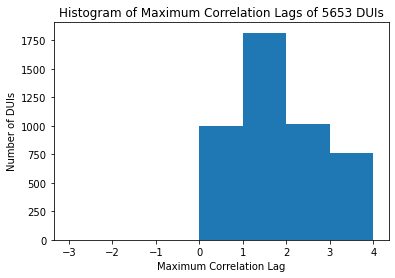

depth: 6
[('D014995', 6.389817714268478), ('D000081246', 1.5826280630839582), ('D005371', 1.1328420619641495), ('D051339', 7.507472135154926), ('D002328', 1.2128378582528645), ('D049631', 4.020423657656552), ('D000583', 0.8819415742080662), ('D002824', 3.1433635365337973), ('D006776', 1.0), ('D000803', 4.9271243489229395), ('D000060', 1.0), ('D032921', 0.853257271304385), ('D042461', 4.511685784392347), ('D002302', 0.7789562191075161), ('D004461', 1.4173195693630454), ('D056464', 3.207552959389893), ('D000114', 3.7758575451649663), ('D017156', 1.2387298200411696), ('D054582', 1.0), ('D000076282', 0.8171255946062246), ('D006358', 1.0), ('D044043', 5.2711082677065635), ('D010174', 5.698207376574504), ('D008046', 4.088167511639897), ('D006850', 6.907572238735093), ('D052247', 7.145066357761129), ('D054581', 1.0), ('D005079', 2.3465177011105633), ('D011825', 0.36644745166947595), ('D001012', 3.4990498206095), ('D002295', 4.762446446540569), ('D017439', 0.4893481116773934), ('D005072', 3.00

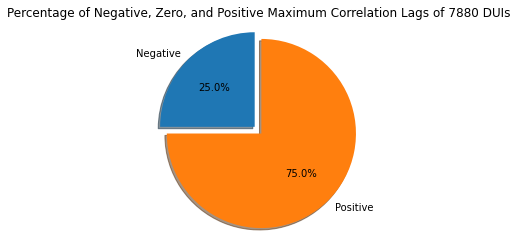

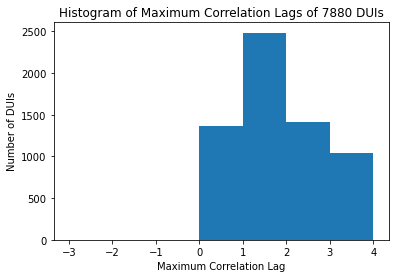

depth: 7
[('D007922', 0.4049871109446164), ('D012381', 2.2962244676201133), ('D000249', 0.3699736416634184), ('D046969', 1.230711702077787), ('D053139', 4.90066285637838), ('D062788', 3.7539660930549985), ('D015293', 2.4016180032537693), ('D012865', 1.0022533228520805), ('D000077195', 1.0728531321749106), ('D005782', 0.7349747946474794), ('D058976', 0.8447179176304904), ('D008246', 5.796136941673638), ('D003919', 2.5338122664907727), ('D007888', 5.785330746532349), ('D006506', 1.9080535887074574), ('D000077310', 0.8137437313073185), ('D008543', 1.5128262335917888), ('D003056', 4.599713814962784), ('D011055', 0.7203658988037275), ('D044784', 0.5384944750942766), ('D014103', 1.8792875208385817), ('D032763', 1.3805148999155958), ('D002130', 2.9548186152456073), ('D030016', 1.1949128554921753), ('D016718', 3.6378766182391673), ('D018538', 1.1803113529436928), ('D003841', 3.6820642248653086), ('D000077144', 2.4451329725814834), ('D016264', 1.3821975902208143), ('D008098', 3.0801182833778227

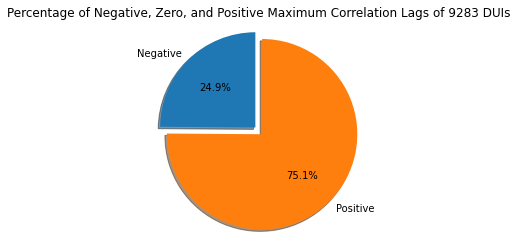

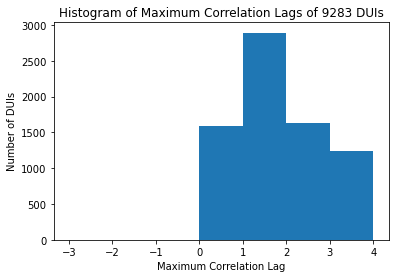

depth: 8
[('D005881', 1.9499057274921578), ('D001491', 1.8536973091825153), ('D001735', 3.0172477904837343), ('D016410', 2.202597108843663), ('D004900', 2.5058883378637686), ('D011241', 4.03759239417242), ('D004335', 1.3200004673098886), ('D014141', 1.3964274087876718), ('D020169', 3.8066905042061587), ('D015251', 6.964633160180333), ('D017085', 4.034176219342723), ('D003400', 0.94677239814864), ('D052248', 5.690809188064686), ('D044950', 0.6223439727511866), ('D014104', 0.6598513836288566), ('D019057', 1.0), ('D012083', 3.6498736281544018), ('D019362', 2.8471915561542476), ('D000074062', 1.0), ('D017470', 4.276338645842304), ('D011237', 1.0), ('D000071066', 2.520363809697), ('D017948', 1.9779909776493667), ('D019005', 1.574690007024817), ('D005733', 2.4709793986100306), ('D019741', 2.2754011831453287), ('D058430', 0.6313283127607473), ('D013609', 1.0419665479100964), ('D066246', 3.3169813348912256), ('D000083262', 0.34543759487848624), ('D004458', 0.2529067951271069), ('D054703', 2.29

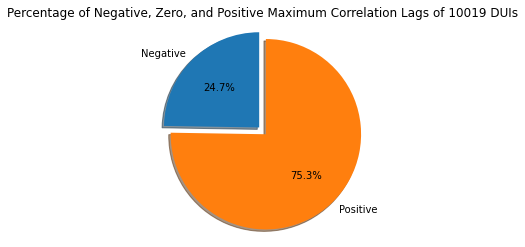

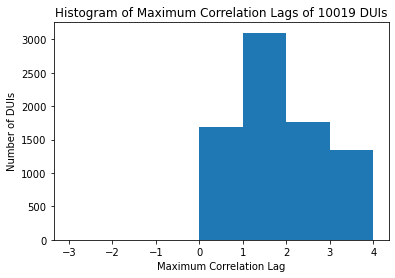

depth: 9
[('D057127', 5.735060318879416), ('D047388', 4.861821891169476), ('D031944', 4.889087453858127), ('D014812', 1.2382326569129605), ('D064486', 0.4871989156519864), ('D000882', 0.7738794585265245), ('D020781', 2.8682035870006417), ('D016335', 3.9745819669088043), ('D005625', 4.079829479903577), ('D000992', 1.5047427947521312), ('D029902', 2.863117514010392), ('D000070003', 5.197877405065551), ('D031042', 2.2119111044363353), ('D027702', 3.2975121185680405), ('D000080907', 1.0), ('D017448', 5.1780968431892225), ('D007347', 3.7701371011040443), ('D008273', 2.242813813108591), ('D031484', 2.3010439083561653), ('D056564', 1.7403034452554622), ('D031701', 4.156429425105834), ('D048668', 3.402195641654762), ('D054768', 6.5688333201740585), ('D040301', 2.484455234580228), ('D030017', 5.506590621635278), ('D018724', 1.395695660268243), ('D001726', 3.4528133385262616), ('D007382', 0.5946153105161627), ('D051301', 2.958602169270908), ('D031022', 4.273646291371299), ('D051197', 2.650062705

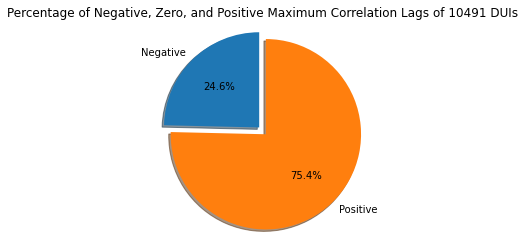

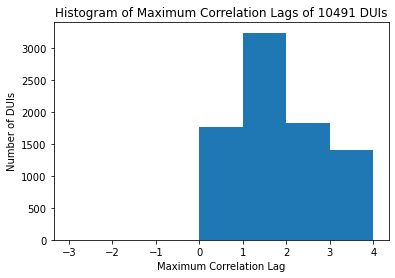

depth: 10
[('D054893', 3.5868800255314435), ('D018342', 4.48720313188933), ('D062486', 1.0), ('D027723', 0.49596197900460093), ('D000069557', 2.5669567253157557), ('D010129', 3.514619504958724), ('D020379', 1.0), ('D015802', 4.207481621704028), ('D050681', 1.1801114113978757), ('D055611', 3.5106332228573116), ('D043705', 4.650785751716699), ('D022161', 0.9275000136531983), ('D018091', 1.4803961729592967), ('D055114', 0.8265234358829241), ('D002736', 1.799142811108763), ('D016762', 2.1469260202560356), ('D044105', 5.090380378529649), ('D053616', 1.531729361974416), ('D064652', 1.2420826838482606), ('D016219', 1.0), ('D054397', 6.083102474078434), ('D044103', 3.3952100950697366), ('D016176', 2.86013973953009), ('D048728', 3.6710054657621276), ('D000069455', 2.3044078761119433), ('D000076222', 8.67166278978424), ('D000068258', 5.030621899122047), ('D007142', 4.947830198197442), ('D007137', 5.314019416898521), ('D004166', 0.659969031493802), ('D002212', 0.6069792116840949), ('D018113', 1.5

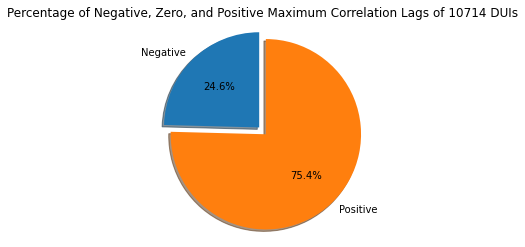

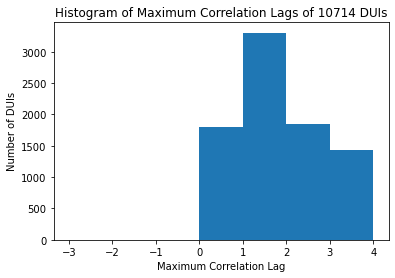

depth: 11
[('D032413', 1.720872689275976), ('D031965', 5.942418629050329), ('D031955', 2.1242912015348594), ('D000091246', 0.22743173750317078), ('D031989', 0.9484600657682332), ('D020457', 0.28566607663768506), ('D051658', 2.442895057186218), ('D014863', 0.8387517134343884), ('D018911', 5.170239625685284), ('D048888', 2.7089264406358544), ('D000080882', 0.584399466554345), ('D006853', 3.3013098881192144), ('D054894', 1.4874920775591156), ('D065856', 1.0277722704514882), ('D033621', 0.7586972453932854), ('D032108', 0.45045846191650823), ('D001000', 3.228952503464371), ('D016645', 5.6503003303950505), ('D031325', 0.7278885600982318), ('D012278', 3.5682122641507408), ('D029799', 4.750270652238982), ('D046008', 1.9593646987092501), ('D012519', 4.225970329495142), ('D027845', 0.7393371578793607), ('D051379', 3.447275481251163), ('D019596', 1.8772532645107336), ('D015440', 1.7017397857724068), ('D013602', 4.941201923708779), ('D006377', 2.9229336381590096), ('D031985', 0.9271617069456741), 

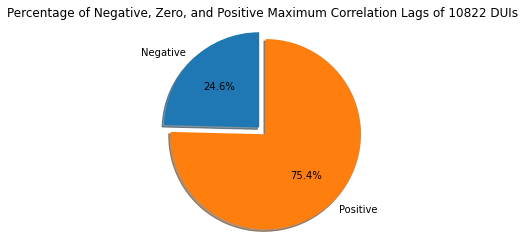

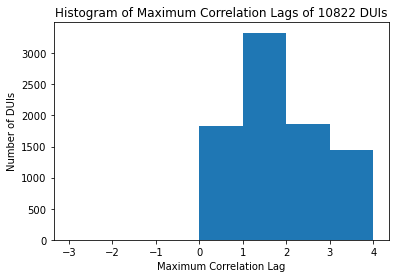

depth: 12
[('D027826', 0.33481708015489986), ('D028521', 0.44067605703552787), ('D000086542', 1.7306418278542084), ('D054520', 3.4663302521446364), ('D030024', 0.5713434327302899), ('D015186', 0.775849007771364), ('D004285', 3.923860726157102), ('D030681', 1.6595006120965383), ('D000504', 6.372916389223597), ('D000075942', 1.805728781265469), ('D032107', 2.651072711002007), ('D030221', 2.686450817074385), ('D055354', 1.0711077049179583), ('D009714', 7.107875487066255), ('D019950', 6.206903255028881), ('D002612', 1.028525789624325), ('D054501', 4.3410981782567495), ('D017836', 1.8924627017385645), ('D017173', 3.5427595739979703), ('D000079702', 0.5922705314226872), ('D048054', 5.767921864669643), ('D009036', 4.41781496083627), ('D031622', 2.51895566289842), ('D048052', 4.6844874905734555), ('D050378', 3.3495475867625455), ('D016699', 5.526703117489916), ('D011992', 5.530842597577165), ('D018734', 3.5392682588523012), ('D018649', 1.373468954268958), ('D054465', 5.215367086975726), ('D019

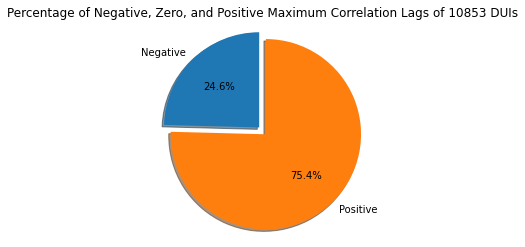

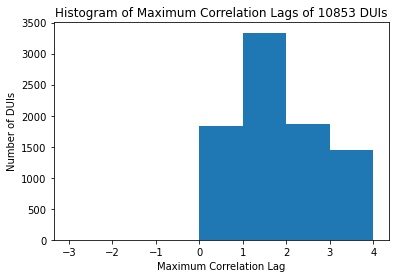

depth: 13
[('D030221', 2.686450817074385), ('D055354', 1.0711077049179583), ('D009714', 7.107875487066255), ('D019950', 6.206903255028881), ('D002612', 1.028525789624325), ('D054501', 4.3410981782567495), ('D017836', 1.8924627017385645), ('D017173', 3.5427595739979703), ('D000079702', 0.5922705314226872), ('D048054', 5.767921864669643), ('D009036', 4.41781496083627), ('D031622', 2.51895566289842), ('D048052', 4.6844874905734555), ('D050378', 3.3495475867625455), ('D016699', 5.526703117489916), ('D011992', 5.530842597577165), ('D018734', 3.5392682588523012), ('D018649', 1.373468954268958), ('D054465', 5.215367086975726), ('D019413', 1.765761545065012), ('D032384', 0.5751909555149916), ('D005289', 2.776832395536996), ('D010041', 0.8187908317295078), ('D018900', 3.7768516651091013), ('D011181', 3.4390632174625964), ('D019597', 1.6863855565907806), ('D002520', 3.62234254954545), ('D013712', 1.4066984218596923), ('D027582', 0.8275150049260919), ('D031446', 1.806731141442648), ('D002188', 0.

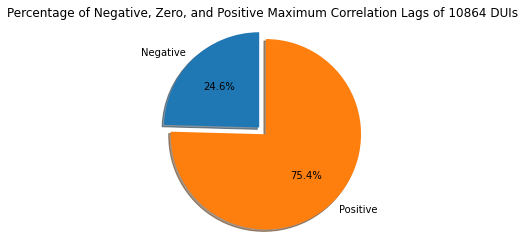

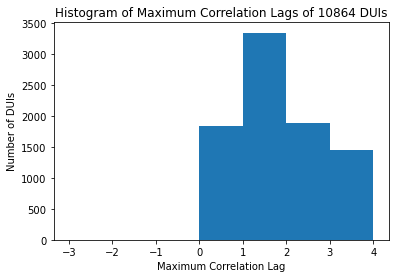

depth: 14
[('D048054', 5.767921864669643), ('D009036', 4.41781496083627), ('D031622', 2.51895566289842), ('D048052', 4.6844874905734555), ('D050378', 3.3495475867625455), ('D016699', 5.526703117489916), ('D011992', 5.530842597577165), ('D018734', 3.5392682588523012), ('D018649', 1.373468954268958), ('D054465', 5.215367086975726), ('D019413', 1.765761545065012), ('D032384', 0.5751909555149916), ('D005289', 2.776832395536996), ('D010041', 0.8187908317295078), ('D018900', 3.7768516651091013), ('D011181', 3.4390632174625964), ('D019597', 1.6863855565907806), ('D002520', 3.62234254954545), ('D013712', 1.4066984218596923), ('D027582', 0.8275150049260919), ('D031446', 1.806731141442648), ('D002188', 0.7544525537591988), ('D029661', 0.5166614078458547), ('D018728', 1.918046905979519), ('D000177', 3.1318063463917394), ('D046011', 1.3843199897572964), ('D029662', 2.567313044196583), ('D050636', 2.776253649364985), ('D018773', 3.5326592352829485), ('D051659', 1.7989677910836637), ('D000071476', 0

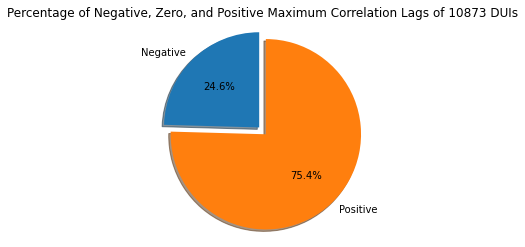

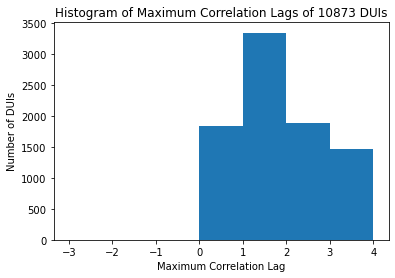

In [41]:
# iterate over max_depth and create a histogram of the maximum correlation lags of duis in dui_subset, then plot it
max_depth = 13
single_level_duis_mcclags = []
single_level_duis = []
multi_level_duis_mcclags = []
greater_one_percentages = []
greater_one_std = []
greater_one_maxs = []
greater_one_mins = []
for depth in range(max_depth + 1):
    print('depth:', depth + 1)
    dui_subset = [dui for level in range(depth + 1) for dui in level2duis[level] if dui in dui2aucratiochild]
    dui_subset_mcclags = [dui2aucratiochild[dui] for dui in dui_subset]
    print(list(zip(dui_subset[-100:], dui_subset_mcclags[-100:])))
    print('len(dui_subset):', len(dui_subset_mcclags))
    neg = len([lag for lag in dui_subset_mcclags if lag <= 1])
    pos = len([lag for lag in dui_subset_mcclags if lag > 1])
    ppos = pos / (len(dui_subset_mcclags) + 0.000000001) * 100
    # pzero = zero / (len(dui_subset_mcclags) + 0.000000001) * 100
    pneg = neg / (len(dui_subset_mcclags) + 0.000000001) * 100
    # print the true value and percentage of negative, zero, and positive maximum correlation lags add 0.000000001 to avoid division by zero
    print('neg:', neg, 'Ratio:', pneg)
    # print('zero:', zero, 'Ratio:', pzero)
    print('pos:', pos, 'Ratio:', ppos)

    if neg + pos == 0:
        print('=' * 50)
        continue

    dui_subset_single_level = [dui for dui in level2duis[depth] if dui in dui2aucratiochild]
    single_level_duis.append(dui_subset_single_level)
    print('len(dui_subset_single_level):', len(dui_subset_single_level))
    dui_subset_single_level_mcclags = [dui2aucratiochild[dui] for dui in dui_subset_single_level]
    single_level_duis_mcclags.append(dui_subset_single_level_mcclags)
    greater_one_maxs.append([dui_subset_single_level[np.argmax(dui_subset_single_level_mcclags)], np.max(dui_subset_single_level_mcclags)])
    greater_one_mins.append([dui_subset_single_level[np.argmin(dui_subset_single_level_mcclags)], np.min(dui_subset_single_level_mcclags)])
    dui_greater_one_std = np.std(dui_subset_single_level_mcclags)
    greater_one_std.append(dui_greater_one_std)
    greater_one_percentages.append(ppos)
    multi_level_duis_mcclags.append(dui_subset_mcclags)
    
    # plot the three accuracy scores as a pie graph. choose the one pie graph that is empty in the middle   
    labels = 'Negative', 'Positive'
    sizes = [neg, pos]
    explode = (0.1, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    fig1.patch.set_facecolor('white')
    plt.title('Percentage of Negative, Zero, and Positive Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.show()

    # plot the histogram of the maximum correlation lags of dui_subset_mcclags. bound the x-axis to -3 to 5 with 1 intervals
    plt.hist(dui_subset_mcclags, bins=range(-3, 5, 1))
    plt.title('Histogram of Maximum Correlation Lags of ' + str(len(dui_subset)) + ' DUIs')
    plt.xlabel('Maximum Correlation Lag')
    plt.ylabel('Number of DUIs')
    plt.show()

   #save pos / (len(dui_subset_mcclags) + 0.000000001) * 100 to a txt file named like STIDX_<START_FROM_IDX>_DEPTH_<depth>.txt at data/SF11/results
    with open(LAG_DATA_ADDRESS + SF_TAG + '/results/DEPTH_' + str(depth) + '_IMP.txt', 'w') as f:
        f.write(str(ppos))
    
    print('=' * 50)

In [42]:
import os

SFS = ['SF10', 'SF11', 'SF12', 'SF13', 'SF14', 'SF15', 'SF16', 'SF17', 'SF18', 'SF19', 'SF20']
max_window_freq_percents, max_window_imp_percents = [], []
freq_std, imp_std = [], []

for depth in range(1, 14):
    freq_percents_across_years, imp_percents_across_years = [], []
    for sf in SFS:
        freq_address = LAG_DATA_ADDRESS + sf + '/results/DEPTH_' + str(depth) + '_FREQ.txt'
        imp_address = LAG_DATA_ADDRESS + sf + '/results/DEPTH_' + str(depth) + '_IMP.txt'
        with open(freq_address, 'r') as f:
            freq = float(f.read())
        with open(imp_address, 'r') as f:
            imp = float(f.read())
        freq_percents_across_years.append(freq)
        imp_percents_across_years.append(imp)
        if sf == 'SF10':
            max_window_freq_percents.append(freq)
            max_window_imp_percents.append(imp)
    
    freq_std.append(np.std(freq_percents_across_years))
    imp_std.append(np.std(imp_percents_across_years))
    print('depth:', depth)
    print('freq_percents_across_years:', freq_percents_across_years)
    print('imp_percents_across_years:', imp_percents_across_years)
    print('freq_percents_across_years std:', np.std(freq_percents_across_years))
    print('imp_percents_across_years std:', np.std(imp_percents_across_years))

len(freq_std), len(imp_std), len(max_window_freq_percents), len(max_window_imp_percents)

depth: 1
freq_percents_across_years: [87.93103448124258, 84.48275861923305, 68.96551724019025, 79.3103448262188, 81.03448275722354, 81.03448275722354, 99.99999999827587, 99.99999999827587, 99.99999999827587, 99.99999999827587, 99.99999999827587]
imp_percents_across_years: [75.86206896420929, 72.41379310219976, 74.13793103320452, 70.68965517119501, 67.2413793091855, 58.620689654161716, 70.68965517119501, 84.48275861923305, 91.37931034325209, 87.93103448124258, 82.7586206882283]
freq_percents_across_years std: 10.649083229573781
imp_percents_across_years std: 9.283443821132007
depth: 2
freq_percents_across_years: [85.46307151220931, 89.91793669391569, 81.82883939029094, 88.15943728008422, 90.62133645944827, 92.26260257902432, 99.7655334113719, 99.99999999988277, 99.99999999988277, 99.99999999988277, 98.00703399754043]
imp_percents_across_years: [74.20867526368792, 72.6846424383673, 71.16060961304672, 69.2848769049598, 66.5885111370849, 64.83001172325342, 67.29191090261747, 69.28487690495

(13, 13, 13, 13)

In [43]:
freq_std = np.array(freq_std)
max_window_freq_percents = np.array(max_window_freq_percents)
imp_std = np.array(imp_std)
max_window_imp_percents = np.array(max_window_imp_percents)

freq_error_max = np.minimum(max_window_freq_percents + freq_std, 99.9) - max_window_freq_percents
imp_error_max = np.minimum(max_window_imp_percents + imp_std, 99.9) - max_window_imp_percents

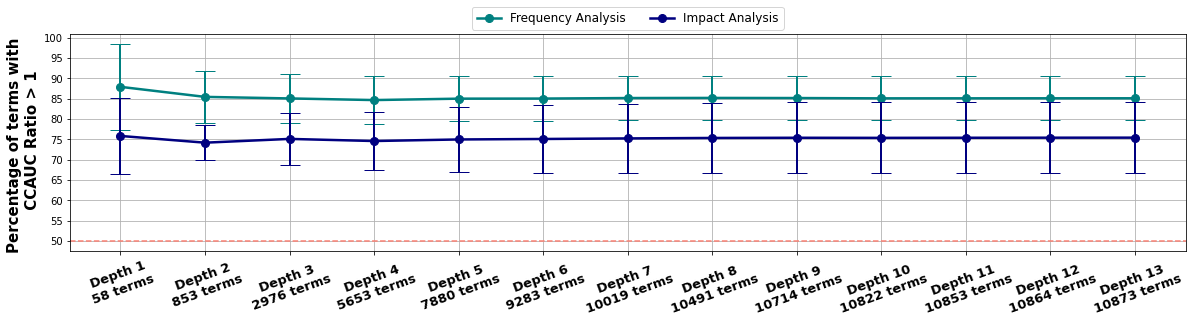

In [44]:
import matplotlib.pyplot as plt

x = ['Depth ' + str(each + 1) + '\n' + str(len(multi_level_duis_mcclags[each])) + ' terms' for each in range(len(greater_one_percentages))]

fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111)
ax.axhline(y=50, color='salmon', linestyle='--')
line2, = ax.plot(x, max_window_freq_percents, marker='o', color='teal', linewidth=2.5, markersize=8, label='Frequency Analysis')
ax.errorbar(x, max_window_freq_percents, yerr=[freq_std, freq_error_max], fmt='o', ecolor='teal', elinewidth=2, capsize=10, color='teal')
line1, = ax.plot(x, max_window_imp_percents, marker='o', color='navy', linewidth=2.5, markersize=8, label='Impact Analysis')
ax.errorbar(x, max_window_imp_percents, yerr=[imp_std, imp_error_max], fmt='o', ecolor='navy', elinewidth=2, capsize=10, color='navy')

ax.grid(True)  # Add gridlines
ax.set_ylabel('Percentage of terms with \n CCAUC Ratio > 1', fontsize=15, weight='bold')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=20, fontsize=13, weight='bold')
ax.set_yticks(range(50, 101, 5))  # Set y-axis ticks from 50 to 100 in steps of 10

plt.legend(loc='upper center', fontsize='large', bbox_to_anchor=(0.5, 1.15), ncol=4)  # Add legend
plt.savefig('impact_vs_freq_CCAUC.png', dpi=300, bbox_inches='tight')
plt.show()

plotting together

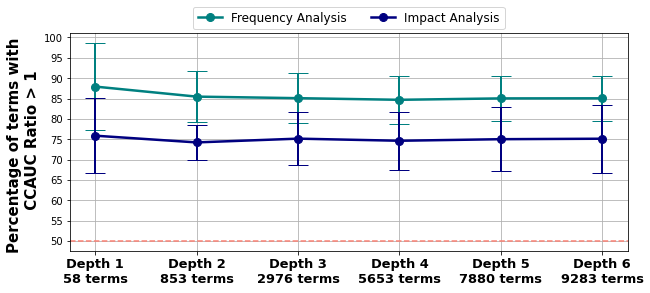

In [45]:
import matplotlib.pyplot as plt

chunk_size = 6
x = ['Depth ' + str(each + 1) + '\n' + str(len(multi_level_duis_mcclags[each])) + ' terms' for each in range(len(greater_one_percentages[:chunk_size]))]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.axhline(y=50, color='salmon', linestyle='--')
line2, = ax.plot(x, max_window_freq_percents[:chunk_size], marker='o', color='teal', linewidth=2.5, markersize=8, label='Frequency Analysis')
ax.errorbar(x, max_window_freq_percents[:chunk_size], yerr=[freq_std[:chunk_size], freq_error_max[:chunk_size]], fmt='o', ecolor='teal', elinewidth=2, capsize=10, color='teal')
line1, = ax.plot(x, max_window_imp_percents[:chunk_size], marker='o', color='navy', linewidth=2.5, markersize=8, label='Impact Analysis')
ax.errorbar(x, max_window_imp_percents[:chunk_size], yerr=[imp_std[:chunk_size], imp_error_max[:chunk_size]], fmt='o', ecolor='navy', elinewidth=2, capsize=10, color='navy')

ax.grid(True)  # Add gridlines
ax.set_ylabel('Percentage of terms with \n CCAUC Ratio > 1', fontsize=15, weight='bold')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=13, weight='bold')
ax.set_yticks(range(50, 101, 5))  # Set y-axis ticks from 50 to 100 in steps of 10

plt.legend(loc='upper center', fontsize='large', bbox_to_anchor=(0.5, 1.15), ncol=4)  # Add legend
plt.savefig('impact_vs_freq_CCAUC.png', dpi=300, bbox_inches='tight')
plt.show()

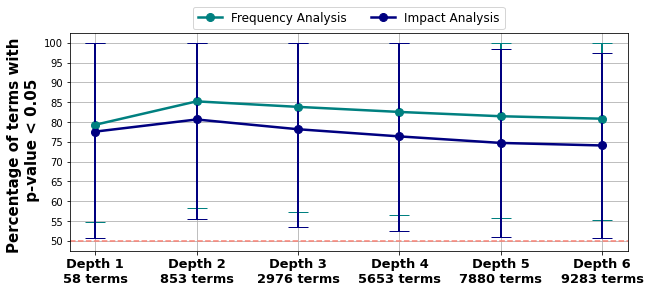

In [46]:
import matplotlib.pyplot as plt

chunk_size = 6
x = ['Depth ' + str(each + 1) + '\n' + str(len(multi_level_duis[each])) + ' terms' for each in range(len(depth_wise_chi2tests_maxlen[:chunk_size]))]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.axhline(y=50, color='salmon', linestyle='--')
line2, = ax.plot(x, depth_wise_chi2tests_maxlen_freq[:chunk_size], marker='o', color='teal', linewidth=2.5, markersize=8, label='Frequency Analysis')
ax.errorbar(x, depth_wise_chi2tests_maxlen_freq[:chunk_size], yerr=[depth_wise_chi2tests_std_freq[:chunk_size], chi2tests_freq_error_max[:chunk_size]], fmt='o', ecolor='teal', elinewidth=2, capsize=10, color='teal')
line4, = ax.plot(x, depth_wise_chi2tests_maxlen_imp[:chunk_size], marker='o', color='navy', linewidth=2.5, markersize=8, label='Impact Analysis')
ax.errorbar(x, depth_wise_chi2tests_maxlen_imp[:chunk_size], yerr=[depth_wise_chi2tests_std_imp[:chunk_size], chi2tests_imp_error_max[:chunk_size]], fmt='o', ecolor='navy', elinewidth=2, capsize=10, color='navy')

ax.grid(True)  # Add gridlines
ax.set_ylabel('Percentage of terms with \n p-value < 0.05', fontsize=15, weight='bold')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=13, weight='bold')
ax.set_yticks(range(50, 101, 5))  # Set y-axis ticks from 50 to 100 in steps of 10

plt.legend(loc='upper center', fontsize='large', bbox_to_anchor=(0.5, 1.15), ncol=4)  # Add legend
plt.savefig('impact_vs_freq_granger_causality.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_570987/14926576.py:19: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.set_xticks([])  # Remove x-axis ticks for the top subplot


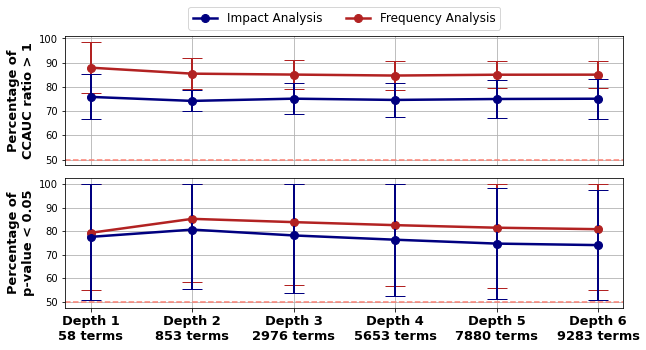

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Your existing data and plots for CCAUC...

# Create a 2x1 grid
fig = plt.figure(figsize=(10, 5), facecolor='white')
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.1)  # Set the height ratios and space between the subplots

# Top subplot for CCAUC
ax1 = fig.add_subplot(gs[0])
ax1.axhline(y=50, color='salmon', linestyle='--')
line2, = ax1.plot(x, max_window_freq_percents[:chunk_size], marker='o', color='firebrick', linewidth=2.5, markersize=8, label='Frequency Analysis')
ax1.errorbar(x, max_window_freq_percents[:chunk_size], yerr=[freq_std[:chunk_size], freq_error_max[:chunk_size]], fmt='o', ecolor='firebrick', elinewidth=2, capsize=10, color='firebrick')
line1, = ax1.plot(x, max_window_imp_percents[:chunk_size], marker='o', color='navy', linewidth=2.5, markersize=8, label='Impact Analysis')
ax1.errorbar(x, max_window_imp_percents[:chunk_size], yerr=[imp_std[:chunk_size], imp_error_max[:chunk_size]], fmt='o', ecolor='navy', elinewidth=2, capsize=10, color='navy')
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels([])  # Remove x-axis labels for the top subplot 
ax1.set_xticks([])  # Remove x-axis ticks for the top subplot
ax1.grid(True)  # Add gridlines
ax1.set_ylabel('Percentage of\nCCAUC ratio > 1', fontsize=13, weight='bold')
ax1.set_yticks(range(50, 101, 10))  # Set y-axis ticks from 50 to 100 in steps of 10
ax1.tick_params(axis='x', colors='white')  # Set the top x-axis tick labels color to white

# Bottom subplot for p-value
ax2 = fig.add_subplot(gs[1], sharex=ax1)  # Share the same x-axis with the top subplot
ax2.axhline(y=50, color='salmon', linestyle='--')
line2, = ax2.plot(x, depth_wise_chi2tests_maxlen_freq[:chunk_size], marker='o', color='firebrick', linewidth=2.5, markersize=8, label='Frequency Analysis')
ax2.errorbar(x, depth_wise_chi2tests_maxlen_freq[:chunk_size], yerr=[depth_wise_chi2tests_std_freq[:chunk_size], chi2tests_freq_error_max[:chunk_size]], fmt='o', ecolor='firebrick', elinewidth=2, capsize=10, color='firebrick')
line4, = ax2.plot(x, depth_wise_chi2tests_maxlen_imp[:chunk_size], marker='o', color='navy', linewidth=2.5, markersize=8, label='Impact Analysis')
ax2.errorbar(x, depth_wise_chi2tests_maxlen_imp[:chunk_size], yerr=[depth_wise_chi2tests_std_imp[:chunk_size], chi2tests_imp_error_max[:chunk_size]], fmt='o', ecolor='navy', elinewidth=2, capsize=10, color='navy')
ax2.grid(True)  # Add gridlines
ax2.set_ylabel('Percentage of\np-value < 0.05', fontsize=13, weight='bold')
ax2.set_xticks(range(len(x)))
ax2.set_xticklabels(x, fontsize=13, weight='bold')  # Set x-axis labels for the bottom subplot
ax2.set_yticks(range(50, 101, 10))  # Set y-axis ticks from 50 to 100 in steps of 10

# Create a combined legend for both subplots and position it at the top of the top subplot
combined_lines = [line1, line2]
combined_labels = [line.get_label() for line in combined_lines]
ax1.legend(combined_lines, combined_labels, loc='upper center', fontsize='large', bbox_to_anchor=(0.5, 1.27), ncol=3)

# Save the plot or display it
plt.savefig('impact_vs_freq_combined.png', dpi=300, bbox_inches='tight')
plt.show()